# Vancouver Airbnb Dataset

## Setup

In [175]:
import os
import sys

venv_name = "venv"

if not os.path.exists(venv_name):
    print(f"Creating virtual environment '{venv_name}'...")
    # We use sys.executable to ensure we use the same python version
    os.system(f"{sys.executable} -m venv {venv_name}")
    print(f"Virtual environment created.")
else:
    print(f"Virtual environment '{venv_name}' already exists.")

Virtual environment 'venv' already exists.


In [176]:
#Auto Install everything I need

packages = [
    "pandas",
    "matplotlib",
    "seaborn",
    "scipy",        # For hypothesis testing
    "plotly",       # For interactive maps
    "folium",       # For alternative interactive maps
    "nbformat",     # The package you were missing for plotly
    "jupyterlab",    # Good to have Jupyter inside the venv
    "ipywidgets",    # For interactive widgets in Jupyter
    "tabulate"     # For better table display in Jupyter
]

# --- Find the correct pip executable ---
if sys.platform == "win32":
    pip_executable = os.path.join(venv_name, "Scripts", "pip.exe")
else:
    pip_executable = os.path.join(venv_name, "bin", "pip")

# --- Install the packages ---
print("Installing packages into the virtual environment...")
for package in packages:
    print(f"Installing {package}...")
    os.system(f"{pip_executable} install {package}")

print("All packages installed.")

Installing packages into the virtual environment...
Installing pandas...
Installing matplotlib...
Installing seaborn...
Installing scipy...
Installing plotly...
Installing folium...
Installing nbformat...
Installing jupyterlab...
Installing ipywidgets...
Installing tabulate...
All packages installed.


## Import csv

In [177]:
import pandas as pd
import numpy as np

df = pd.read_csv('listings.csv')
df.head(5)

id                         listing_url       scrape_id last_scraped  \
0  13188  https://www.airbnb.com/rooms/13188  20250810152821   2025-08-10   
1  13358  https://www.airbnb.com/rooms/13358  20250810152821   2025-08-10   
2  16611  https://www.airbnb.com/rooms/16611  20250810152821   2025-08-10   
3  18270  https://www.airbnb.com/rooms/18270  20250810152821   2025-08-10   
4  18589  https://www.airbnb.com/rooms/18589  20250810152821   2025-08-10   

            source                                               name  \
0      city scrape                  Garden level studio in ideal loc.   
1      city scrape                     Downtown Designer  one bedroom   
2  previous scrape  1 block to skytrain station, shops,restaurant,...   
3      city scrape                private rm in clean central 2BR apt   
4      city scrape                               Commercial Drive B&B   

                                         description  \
0  Garden level studio suite with garden patio - ...   
1  The iconic Electra Building.<br />A Vancouver ...   
2  My place is close to bank, coffee shops, groce...   
3  I have a bright furnished 2 bedroom suite on a...   
4  As hosts, we are welcoming you into our home, ...   

                               neighborhood_overview  \
0  The uber hip Main street area is a short walk ...   
1  2 blocks away from the shopping area of Robson...   
2  Next block to Commercial Drive which has many ...   
3  Lots of restaurants, coffee shops.<br />Easy a...   
4  Lots of restaurants and boutiques just outside...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/8408188/e1af6...    51466  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...    52116  ...   
2  https://a0.muscache.com/pictures/82101/7127b63...    58512  ...   
3  https://a0.muscache.com/pictures/108520241/aec...    70437  ...   
4  https://a0.muscache.com/pictures/dd3ca406-cb74...    71508  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.94                   4.90                4.81   
1                        4.81                   4.91                4.66   
2                        4.33                   5.00                3.67   
3                        4.73                   4.69                4.49   
4                        5.00                   4.93                4.96   

                                             license instant_bookable  \
0  Municipal registration number: 25-156058<br />...                f   
1  Municipal registration number: 25-157257<br />...                t   
2                                                NaN                f   
3                                                NaN                f   
4  Municipal registration number: 25-155972<br />...                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              5                                           5   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.98  
1                                           0              3.12  
2                                           0              0.03  
3                                           0              0.67  
4

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5550 non-null   int64  
 1   listing_url                                   5550 non-null   object 
 2   scrape_id                                     5550 non-null   int64  
 3   last_scraped                                  5550 non-null   object 
 4   source                                        5550 non-null   object 
 5   name                                          5550 non-null   object 
 6   description                                   5489 non-null   object 
 7   neighborhood_overview                         2802 non-null   object 
 8   picture_url                                   5550 non-null   object 
 9   host_id                                       5550 non-null   i

In [179]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  5.550000e+03  5.550000e+03  5.550000e+03          5548.000000   
mean   7.212136e+17  2.025081e+13  2.486465e+08            12.339041   
std    5.640347e+17  0.000000e+00  2.225780e+08            37.943111   
min    1.318800e+04  2.025081e+13  6.033000e+03             1.000000   
25%    4.229575e+07  2.025081e+13  3.899611e+07             1.000000   
50%    8.777264e+17  2.025081e+13  1.952416e+08             2.000000   
75%    1.225518e+18  2.025081e+13  4.535973e+08             5.000000   
max    1.483828e+18  2.025081e+13  7.122721e+08           766.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                5548.000000                           0.0  5550.000000   
mean                   20.724225                           NaN    49.261179   
std                    57.532584                           NaN     0.021399   
min                     1.000000                           NaN    49.202270   
25%                     1.000000                           NaN    49.247595   
50%                     3.000000                           NaN    49.266691   
75%                     8.000000                           NaN    49.278892   
max                   943.000000                           NaN    49.294360   

         longitude  accommodates    bathrooms  ...  review_scores_cleanliness  \
count  5550.000000   5550.000000  4646.000000  ...                4823.000000   
mean   -123.111347      3.674955     1.352023  ...                   4.744676   
std       0.040218      2.120093     0.688599  ...                   0.469888   
min    -123.223370      1.000000     0.000000  ...                   1.000000   
25%    -123.130649      2.000000     1.000000  ...                   4.720000   
50%    -123.112210      4.000000     1.000000  ...                   4.880000   
75%    -123.086756      4.000000     2.000000  ...                   4.980000   
max    -123.023530     16.000000     8.000000  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count            4823.000000                  4823.000000   
mean                4.840278                     4.854078   
std                 0.336280                     0.374847   
min                 1.000000                     1.000000   
25%                 4.820000                     4.865000   
50%                 4.930000                     4.960000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count             4823.000000          4823.000000   
mean                 4.809140             4.645685   
std                  0.298626             0.468471   
min                  1.000000             1.000000   
25%                  4.760000             4.600000   
50%                  4.890000             4.750000   
75%                  5.000000             4.870000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                     5550.000000   
mean                         8.292973   
std                         24.473028   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          4.000000   
max                        147.000000   

       calculated_host_listings_count_entire_homes  \
count                                  5550.000000   
mean                                      6.601982   
std                                      24.005675   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     147.000000   

       calculated_host_listings_

In [180]:
# % missing by column
na_rate = df.isna().mean().sort_values(ascending=False)
na_rate.head(20)

neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
host_about                      0.498739
neighborhood_overview           0.495135
neighbourhood                   0.495135
host_location                   0.232973
license                         0.216216
estimated_revenue_l365d         0.164144
price                           0.164144
bathrooms                       0.162883
beds                            0.162523
host_response_time              0.150090
host_response_rate              0.150090
review_scores_communication     0.130991
review_scores_location          0.130991
review_scores_cleanliness       0.130991
review_scores_accuracy          0.130991
review_scores_checkin           0.130991
review_scores_value             0.130991
last_review                     0.130811
dtype: float64

In [181]:
# constant / near-constant features
nunique = df.nunique(dropna=False).sort_values()
const_cols = nunique[nunique<=1].index.tolist()
const_cols

['last_scraped',
 'scrape_id',
 'neighbourhood_group_cleansed',
 'calendar_last_scraped',
 'calendar_updated']

### Initial Insights/First Impressions:

A lot of columns are regarding metadata I don't neccessarily need or would not be practical for an analysis. For example:

id: Pandas already assigns each row an ID. The ID in the dataset isn't correlated with the item. For example, "13188" doesn't really say anything about the property. It's just as arbitary as Pandas assigning it an index value of 0. 

The same applies to scrape_id (which seems to use the timestamp of last_scraped as it's 20250810152821 vs 2025-08-10), last_scraped. I don't think it's relevant to know what scraped the data. The data is here therefore it is scraped.

Host metadata: Columns like host_thumbnail_url, host_picture_url and arguably even host_name are unnessary. Aside from being images (well, links to images that don't even show up in the dataset). In any case, I don't believe how a URL is formatted is affecting the success of an AirBnb Property so I believe these columns should be dropped.

However, I believe columns like host_has_profile_pic, host_identity_verified, host_response_rate, host_is_superhost, host_since etc would be more relevant in the success of an airbnb property. It's a reasonable assumption that a verified host that's been active a long time would likely attract more tenants and one worth investigating

Latitude/Longitude: I believe these columns are redundant because the column "neighbourhood_cleansed" provides the rough location for a property. For example, the property at 49.24773, -123.10509 is 500 metres from the "neighbourhood_cleansed" location "Riley Park". So I can drop latitude and longitude and instead rely on neighbourhood_cleansed for location information. That being said, A bonus feature could be analyzing how far each property from a point of interest such as downtown. I might keep that in the back.

Property name, description, amenities and even host_description could be candidates for sentiment analysis?

Price isn't stored as a float lol. The dates don't seem to be stored as datetimes. T/F Columns could be made into Booleans

neighbourhood_group_cleansed and calendar_updated are entirely blank.

neighbourhood is either blank or "Neighborhood highlights". So it can be dropped

Columns such as reviews are highly correlated. Columns such as availability has one for 30 days, 60 days, 90 days and 365 days. More analysis needs to be done on how to handle that.


Host verification and Host Verification methods seem redundant. I am going to assume it doesn't matter how a host gets verified (since most either use their email or phone to do it. The specifics doesn't matter)

So many stats for bedrooms, bathrooms and accomodates. I could make columns that are more useful like "'beds_per_guest'", baths_per_guest, price_per_guest etc

host_response_time is text (e.g within the hour). As is host_response_rate and host_acceptance_rate (100%. I could make these scale from 0-1)

All the "calculated_host_listings_count	calculated_host_listings_count_entire_homes	calculated_host_listings_count_private_rooms	calculated_host_listings_count_shared_rooms" ones are redundant when we already have the total host listings column

# Part 1: Dropping the most Unnessary, Redundant or unhelpful Columns. Fixing Datatypes, Booleans and datetimes. Some Graphing


In [182]:
#columns_to_drop = ['last_scraped', 'scrape_id', 'neighbourhood_group_cleansed', 'calendar_last_scraped', 'calendar_updated', 'host_thumbnail_url', 'host_picture_url', 'host_url', 'host_name', 'source', 'longitude', 'latitude', 'host_verifications', 'listing_url', 'picture_url', 'neighbourhood', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count', 'host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'availability_eoy', 'license']

columns_to_drop = ['last_scraped', 'scrape_id', 'neighbourhood_group_cleansed', 'calendar_last_scraped', 'calendar_updated', 'host_thumbnail_url', 'host_picture_url', 'host_url', 'host_name', 'source',  'host_verifications', 'listing_url', 'picture_url', 'neighbourhood', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count', 'host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'availability_eoy', 'license']


df = df.drop(columns=columns_to_drop)
df.shape

(5550, 55)

## Data Type Fixes

### Fixing Price


In [183]:
#Convert Price to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['price'].head()

0    141.0
1    274.0
2      NaN
3     47.0
4    160.0
Name: price, dtype: float64

### Convert Date Columns to datetime

In [184]:
# Convert Date Columns to datetime
date_cols = ['host_since', 'first_review', 'last_review']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   host_since    5548 non-null   datetime64[ns]
 1   first_review  4824 non-null   datetime64[ns]
 2   last_review   4824 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 130.2 KB


### Convert t/fs to Booleans

In [185]:
# Convert t/fs and 1/0 to Booleans
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']

for col in bool_cols:
    df[col] = df[col].map({'t': True, 'f': False, 1: True, 0: False}).astype(bool)
df[bool_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   host_is_superhost       5550 non-null   bool 
 1   host_has_profile_pic    5550 non-null   bool 
 2   host_identity_verified  5550 non-null   bool 
 3   instant_bookable        5550 non-null   bool 
 4   has_availability        5550 non-null   bool 
dtypes: bool(5)
memory usage: 27.2 KB


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           5550 non-null   int64         
 1   name                         5550 non-null   object        
 2   description                  5489 non-null   object        
 3   neighborhood_overview        2802 non-null   object        
 4   host_id                      5550 non-null   int64         
 5   host_since                   5548 non-null   datetime64[ns]
 6   host_location                4257 non-null   object        
 7   host_about                   2782 non-null   object        
 8   host_response_time           4717 non-null   object        
 9   host_response_rate           4717 non-null   object        
 10  host_acceptance_rate         4924 non-null   object        
 11  host_is_superhost            5550 non-null 

In [187]:
df.head()

id                                               name  \
0  13188                  Garden level studio in ideal loc.   
1  13358                     Downtown Designer  one bedroom   
2  16611  1 block to skytrain station, shops,restaurant,...   
3  18270                private rm in clean central 2BR apt   
4  18589                               Commercial Drive B&B   

                                         description  \
0  Garden level studio suite with garden patio - ...   
1  The iconic Electra Building.<br />A Vancouver ...   
2  My place is close to bank, coffee shops, groce...   
3  I have a bright furnished 2 bedroom suite on a...   
4  As hosts, we are welcoming you into our home, ...   

                               neighborhood_overview  host_id host_since  \
0  The uber hip Main street area is a short walk ...    51466 2009-11-04   
1  2 blocks away from the shopping area of Robson...    52116 2009-11-07   
2  Next block to Commercial Drive which has many ...    58512 2009-11-29   
3  Lots of restaurants, coffee shops.<br />Easy a...    70437 2010-01-14   
4  Lots of restaurants and boutiques just outside...    71508 2010-01-18   

       host_location                                         host_about  \
0  Vancouver, Canada  I love to travel with my family in comfort and...   
1  Vancouver, Canada  I am from Vancouver and in my free time I enjo...   
2                NaN                                                NaN   
3  Vancouver, Canada  In my spare time I am pretty active - currentl...   
4  Vancouver, Canada  We - Alexis and Sylvain - are the Artistic Dir...   

  host_response_time host_response_rate  ... last_review  \
0     within an hour               100%  ...  2025-08-08   
1     within an hour               100%  ...  2025-06-22   
2                NaN                NaN  ...  2018-02-16   
3                NaN                NaN  ...  2019-12-31   
4     within an hour               100%  ...  2025-08-05   

   review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0                  4.85                   4.88                       4.86   
1                  4.71                   4.77                       4.82   
2                  4.00                   4.00                       3.00   
3                  4.54                   4.50                       3.98   
4                  4.98                   4.97                       4.98   

   review_scores_checkin  review_scores_communication review_scores_location  \
0                   4.87                         4.94                   4.90   
1                   4.83                         4.81                   4.91   
2                   4.00                         4.33                   5.00   
3                   4.75                         4.73                   4.69   
4                   4.99                         5.00                   4.93   

   review_scores_value  instant_bookable reviews_per_month  
0                 4.81             False              1.98  
1                 4.66              True              3.12  
2                 3.67             False              0.03  
3                 4.49             False              0.67  
4                 4.96             False              3.57  

[5 rows x 55 columns]

## Analyzing review Score columns

In [188]:
# columns containing "review"
review_cols = [c for c in df.columns if "review" in c.lower()]

# 1) Peek at just the review columns
df[review_cols].head(5)


number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                372                     51                       7   
1                575                     43                       0   
2                  3                      0                       0   
3                118                      0                       0   
4                616                     54                       4   

   number_of_reviews_ly first_review last_review  review_scores_rating  \
0                    60   2010-02-21  2025-08-08                  4.85   
1                    56   2010-06-22  2025-06-22                  4.71   
2                     0   2017-12-24  2018-02-16                  4.00   
3                     0   2011-03-17  2019-12-31                  4.54   
4                    71   2011-06-06  2025-08-05                  4.98   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.88                       4.86                   4.87   
1                    4.77                       4.82                   4.83   
2                    4.00                       3.00                   4.00   
3                    4.50                       3.98                   4.75   
4                    4.97                       4.98                   4.99   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.94                    4.90                 4.81   
1                         4.81                    4.91                 4.66   
2                         4.33                    5.00                 3.67   
3                         4.73                    4.69                 4.49   
4                         5.00                    4.93                 4.96   

   reviews_per_month  
0               1.98  
1               3.12  
2               0.03  
3               0.67  
4               3.57

It appears that the columns that measure an individual property's review (e.g review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	review_scores_communication etc) are tightly correlated. I should check that and decide if they should be dropped or merged into an average review score

In [189]:
# pick only the rating columns that exist
score_cols = [c for c in [
    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
    'review_scores_checkin','review_scores_communication','review_scores_location',
    'review_scores_value'
] if c in df.columns]

# correlation matrix
corr_scores = df[score_cols].corr()
print(corr_scores.round(3))

# how strongly each sub-score relates to overall rating
if 'review_scores_rating' in score_cols:
    print("\nCorrelations vs overall:")
    print(corr_scores['review_scores_rating'].sort_values(ascending=False).round(3))


                             review_scores_rating  review_scores_accuracy  \
review_scores_rating                        1.000                   0.906   
review_scores_accuracy                      0.906                   1.000   
review_scores_cleanliness                   0.858                   0.825   
review_scores_checkin                       0.719                   0.726   
review_scores_communication                 0.831                   0.797   
review_scores_location                      0.605                   0.584   
review_scores_value                         0.898                   0.870   

                             review_scores_cleanliness  review_scores_checkin  \
review_scores_rating                             0.858                  0.719   
review_scores_accuracy                           0.825                  0.726   
review_scores_cleanliness                        1.000                  0.646   
review_scores_checkin                            0.646     

Yeah. It looks like review scores are genrally quite correlated. I can combine them into a single column called "average_review_score"

In [190]:
# Take the columns in score_cols  and average them into a new column called 'average_review_score'. Drop the original columns
df['average_review_score'] = df[score_cols].mean(axis=1)
df = df.drop(columns=score_cols)
df[['average_review_score']].head()

average_review_score
0              4.872857
1              4.787143
2              4.000000
3              4.525714
4              4.972857

## Analyzing Review Time Columns

A lot of redundant columns and ones we can calc. I think a more suitable one is to keep just "number_of_reviews" and use it alongside other columns to create a "reviews per year" column.

In [191]:
today = pd.Timestamp('2025-10-06')

# Ensure dates are parsed
for c in ['first_review','last_review']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Active window for reviews: from first_review to last_review (fallbacks included)
start = df['first_review']
end = df['last_review'].fillna(today)              # if no last_review, treat as still active
days_active = (end - start).dt.days

# Avoid div-by-zero/negatives (brand-new or malformed rows)
days_active = days_active.clip(lower=1)

# Reviews per year 
df['reviews_per_year'] = df['number_of_reviews'] / (days_active / 365.25)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5550 non-null   int64         
 1   name                       5550 non-null   object        
 2   description                5489 non-null   object        
 3   neighborhood_overview      2802 non-null   object        
 4   host_id                    5550 non-null   int64         
 5   host_since                 5548 non-null   datetime64[ns]
 6   host_location              4257 non-null   object        
 7   host_about                 2782 non-null   object        
 8   host_response_time         4717 non-null   object        
 9   host_response_rate         4717 non-null   object        
 10  host_acceptance_rate       4924 non-null   object        
 11  host_is_superhost          5550 non-null   bool          
 12  host_n

 Looks good. I can now drop all the other columns regarding review stats

In [192]:
cols_to_drop = ['first_review', 'last_review', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly', 'reviews_per_month']
df = df.drop(columns=cols_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5550 non-null   int64         
 1   name                       5550 non-null   object        
 2   description                5489 non-null   object        
 3   neighborhood_overview      2802 non-null   object        
 4   host_id                    5550 non-null   int64         
 5   host_since                 5548 non-null   datetime64[ns]
 6   host_location              4257 non-null   object        
 7   host_about                 2782 non-null   object        
 8   host_response_time         4717 non-null   object        
 9   host_response_rate         4717 non-null   object        
 10  host_acceptance_rate       4924 non-null   object        
 11  host_is_superhost          5550 non-null   bool          
 12  host_n

## Max/Min Nights

There's 8 columns on how many min/max nights a guest can stay. Lets see if we can get any info out of them

In [193]:
# columns containing "night"
night_cols = [c for c in df.columns if "night" in c.lower()]

# 1) Peek at just the night columns
df[night_cols].head(5)


minimum_nights  maximum_nights  minimum_minimum_nights  \
0               2             180                     1.0   
1               1            1125                     1.0   
2             365             365                   365.0   
3              90            1125                    90.0   
4               1              40                     1.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     2.0                   180.0                   180.0   
1                     2.0                  1125.0                  1125.0   
2                   365.0                   365.0                   365.0   
3                    90.0                  1125.0                  1125.0   
4                     2.0                  1125.0                  1125.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  
0                     2.0                   180.0  
1                     2.0                  1125.0  
2                   365.0                   365.0  
3                    90.0                  1125.0  
4                     1.0                  1125.0

 The columns that aren't min/max seem to average stats and are super correlated. I can safely drop them

In [194]:
cols_to_drop = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']
df = df.drop(columns=cols_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5550 non-null   int64         
 1   name                       5550 non-null   object        
 2   description                5489 non-null   object        
 3   neighborhood_overview      2802 non-null   object        
 4   host_id                    5550 non-null   int64         
 5   host_since                 5548 non-null   datetime64[ns]
 6   host_location              4257 non-null   object        
 7   host_about                 2782 non-null   object        
 8   host_response_time         4717 non-null   object        
 9   host_response_rate         4717 non-null   object        
 10  host_acceptance_rate       4924 non-null   object        
 11  host_is_superhost          5550 non-null   bool          
 12  host_n

## Host Response Time and Rate.

The column host_response_time is text (e.g within the hour). I want to see what unique entries there and possibly make it numeric with a "max_host_response_time".

 As is host_response_rate and host_acceptance_rate (100%. I could make these scale from 0-1)

In [195]:
df['host_response_time'].unique()

array(['within an hour', nan, 'a few days or more', 'within a few hours',
       'within a day'], dtype=object)

The times seem to be 'within an hour', nan, 'a few days or more', 'within a few hours', 'within a day'. I could map within an hour to 1 (for 1 hour max), a few days or more to 168 (assuming a week's wait). 'within a few hours' I am assuming 6 hours max. And 'within a day' to be 24 hours max. Nan I am going to leave Nan (assuming the host never replies)

In [196]:

time_map = {
    'within an hour': 1,
    'within a few hours': 6,
    'within a day': 24,
    'a few days or more': 168
}
df['max_host_response_time_hours'] = df['host_response_time'].map(time_map)
df = df.drop(columns=['host_response_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            5550 non-null   int64         
 1   name                          5550 non-null   object        
 2   description                   5489 non-null   object        
 3   neighborhood_overview         2802 non-null   object        
 4   host_id                       5550 non-null   int64         
 5   host_since                    5548 non-null   datetime64[ns]
 6   host_location                 4257 non-null   object        
 7   host_about                    2782 non-null   object        
 8   host_response_rate            4717 non-null   object        
 9   host_acceptance_rate          4924 non-null   object        
 10  host_is_superhost             5550 non-null   bool          
 11  host_neighbourhood            

In [197]:
# Now for host_response_rate and host_acceptance_rate (both are percentages as strings like '100%')
rate_cols = ['host_response_rate', 'host_acceptance_rate']
for col in rate_cols:
    if col in df.columns:
        df[col] = df[col].str.replace('%', '').astype(float) / 100.0
df[rate_cols].head()

host_response_rate  host_acceptance_rate
0                 1.0                   1.0
1                 1.0                   1.0
2                 NaN                   NaN
3                 NaN                   NaN
4                 1.0                   1.0

## Now for Some Final Summaries and Statsical Analysis

In [198]:
#Now for Some Final Summaries and Statsical Analysis

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            5550 non-null   int64         
 1   name                          5550 non-null   object        
 2   description                   5489 non-null   object        
 3   neighborhood_overview         2802 non-null   object        
 4   host_id                       5550 non-null   int64         
 5   host_since                    5548 non-null   datetime64[ns]
 6   host_location                 4257 non-null   object        
 7   host_about                    2782 non-null   object        
 8   host_response_rate            4717 non-null   float64       
 9   host_acceptance_rate          4924 non-null   float64       
 10  host_is_superhost             5550 non-null   bool          
 11  host_neighbourhood            

In [199]:
df.describe()

id       host_id                     host_since  \
count  5.550000e+03  5.550000e+03                           5548   
mean   7.212136e+17  2.486465e+08  2018-08-08 21:51:00.129776384   
min    1.318800e+04  6.033000e+03            2009-01-05 00:00:00   
25%    4.229575e+07  3.899611e+07            2015-07-24 00:00:00   
50%    8.777264e+17  1.952416e+08            2018-06-13 12:00:00   
75%    1.225518e+18  4.535973e+08            2022-04-10 12:00:00   
max    1.483828e+18  7.122721e+08            2025-08-08 00:00:00   
std    5.640347e+17  2.225780e+08                            NaN   

       host_response_rate  host_acceptance_rate  host_total_listings_count  \
count         4717.000000           4924.000000                5548.000000   
mean             0.962546              0.893280                  20.724225   
min              0.000000              0.000000                   1.000000   
25%              1.000000              0.910000                   1.000000   
50%              1.000000              0.980000                   3.000000   
75%              1.000000              1.000000                   8.000000   
max              1.000000              1.000000                 943.000000   
std              0.149769              0.207894                  57.532584   

          latitude    longitude  accommodates    bathrooms  ...         price  \
count  5550.000000  5550.000000   5550.000000  4646.000000  ...   4639.000000   
mean     49.261179  -123.111347      3.674955     1.352023  ...    289.427678   
min      49.202270  -123.223370      1.000000     0.000000  ...     14.000000   
25%      49.247595  -123.130649      2.000000     1.000000  ...    133.000000   
50%      49.266691  -123.112210      4.000000     1.000000  ...    210.000000   
75%      49.278892  -123.086756      4.000000     2.000000  ...    338.500000   
max      49.294360  -123.023530     16.000000     8.000000  ...  64360.000000   
std       0.021399     0.040218      2.120093     0.688599  ...   1043.364323   

       minimum_nights  maximum_nights  availability_365  number_of_reviews  \
count     5550.000000     5550.000000       5550.000000        5550.000000   
mean        39.304685      398.327207        170.053514          53.624685   
min          1.000000        2.000000          0.000000           0.000000   
25%          2.000000       90.000000         55.000000           3.000000   
50%          3.000000      365.000000        161.000000          19.000000   
75%         90.000000      365.000000        274.000000          69.000000   
max        399.000000     1125.000000        365.000000        1102.000000   
std         49.398457      364.306085        122.717126          88.676272   

       estimated_occupancy_l365d  estimated_revenue_l365d  \
count                5550.000000             4.639000e+03   
mean                  117.156757             3.714505e+04   
min                     0.000000             0.000000e+00   
25%                     0.000000             3.630000e+03   
50%                   108.000000             2.346000e+04   
75%                   234.000000             4.635000e+04   
max                   255.000000             1.641180e+07   
std                   102.637810             2.529879e+05   

       average_review_score  reviews_per_year  max_host_response_time_hours  
count           4824.000000       4824.000000                   4717.000000  
mean               4.777559         56.105166                      6.623702  
min                1.000000          0.473244                      1.000000  
25%                4.762500         10.093582                      1.000000  
50%                4.860000         28.525899                      1.000000  
75%                4.931429         53.186756                      1.000000  
max                5.000000        730.500000                    168.000000  
std                0.356280         92.417188                     24.823179  

[8 rows x 22 co

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

#Some Helper Functions

def topk_counts(s, k=15):
    return s.value_counts(dropna=False).head(k)[::-1] 

def save_show(title, fname=None):
    plt.title(title)
    plt.tight_layout()
    if fname: plt.savefig(fname, dpi=150)
    plt.show()



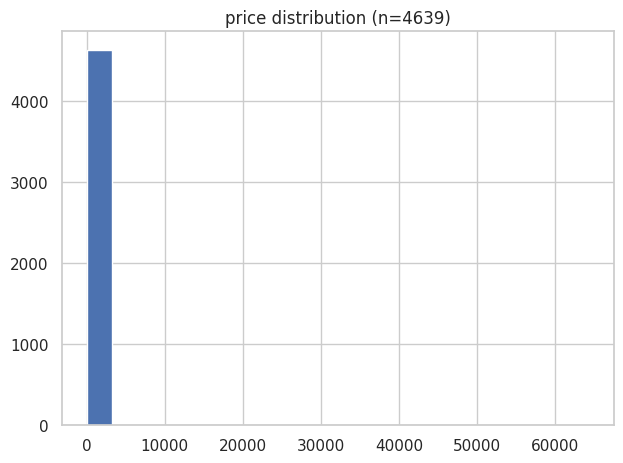

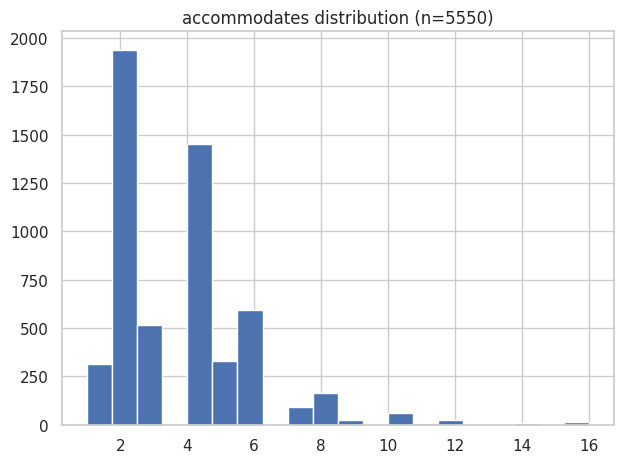

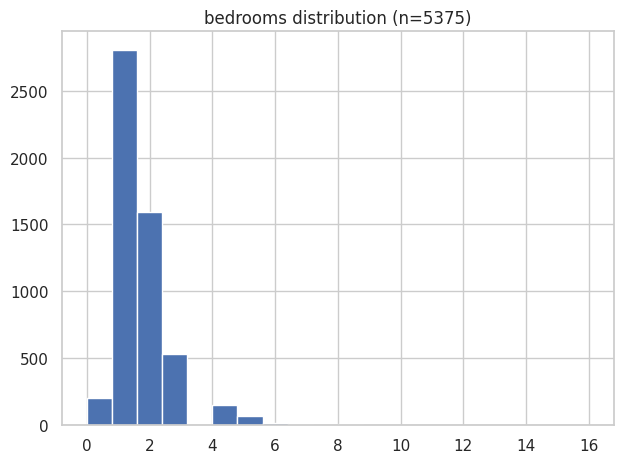

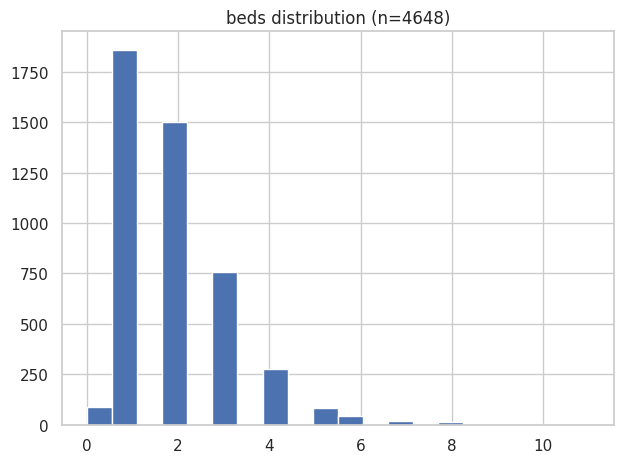

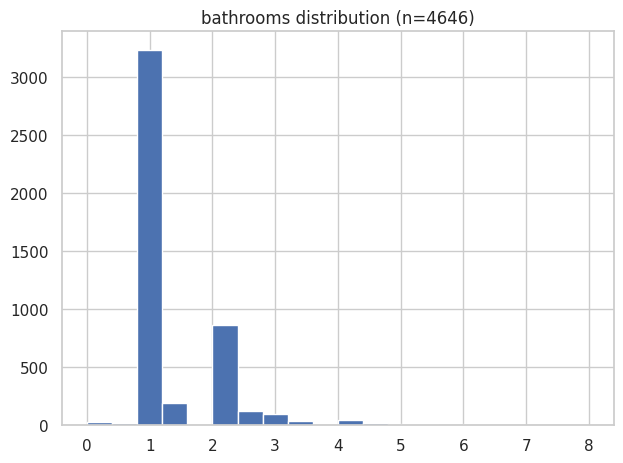

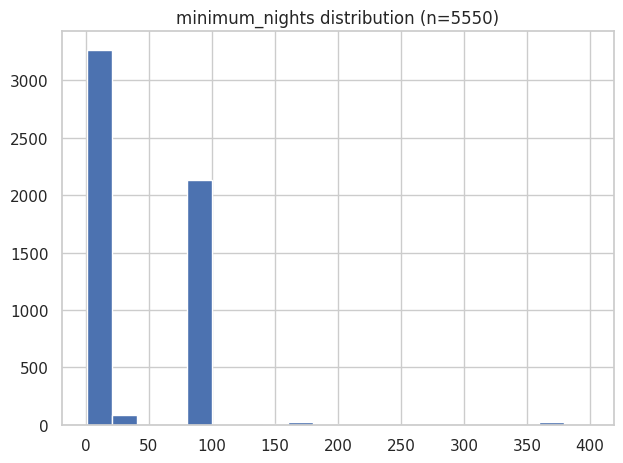

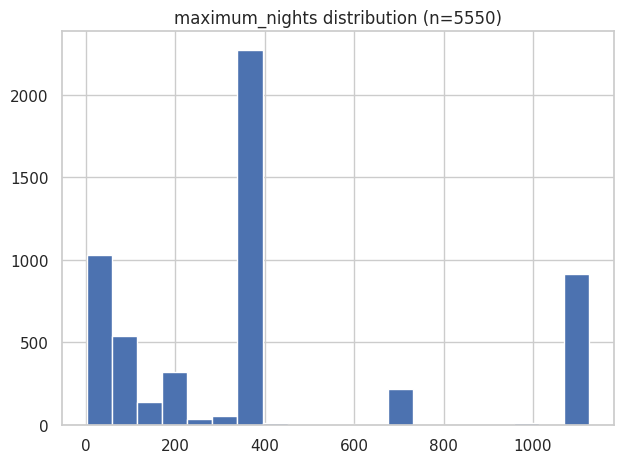

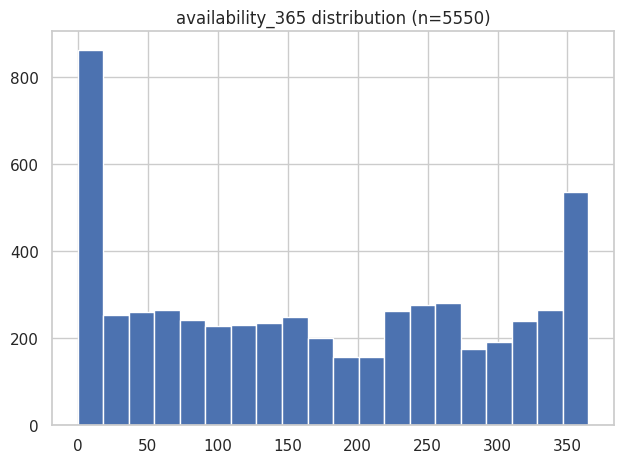

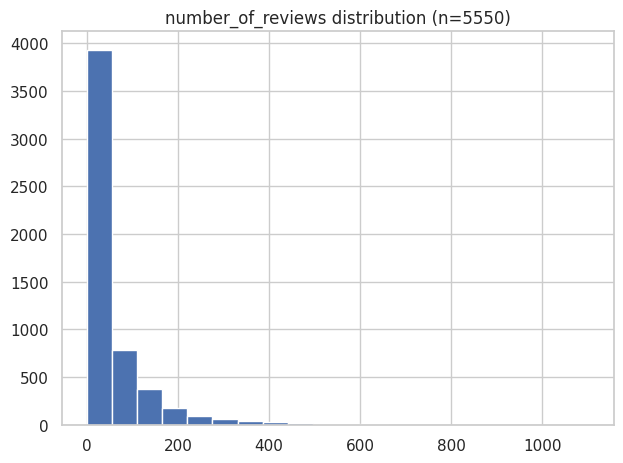

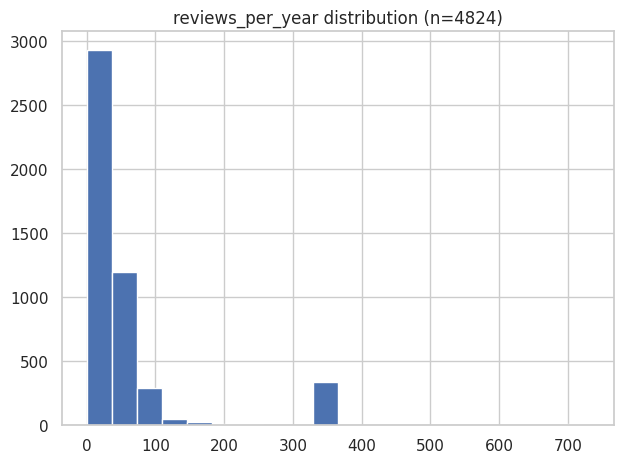

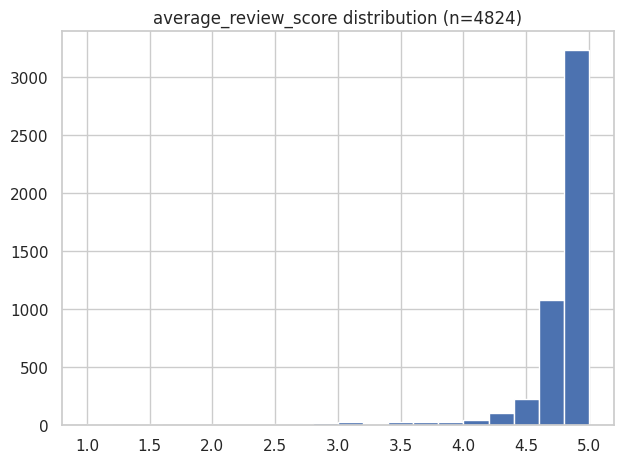

In [201]:
# Numerical columns to plot distributions for

num_cols = ['price','accommodates','bedrooms','beds','bathrooms',
            'minimum_nights','maximum_nights','availability_365',
            'number_of_reviews','reviews_per_year','average_review_score']

for c in [x for x in num_cols if x in df.columns]:
    s = df[c].dropna()
    plt.figure()
    plt.hist(s, bins=20)
    save_show(f'{c} distribution (n={len(s)})')

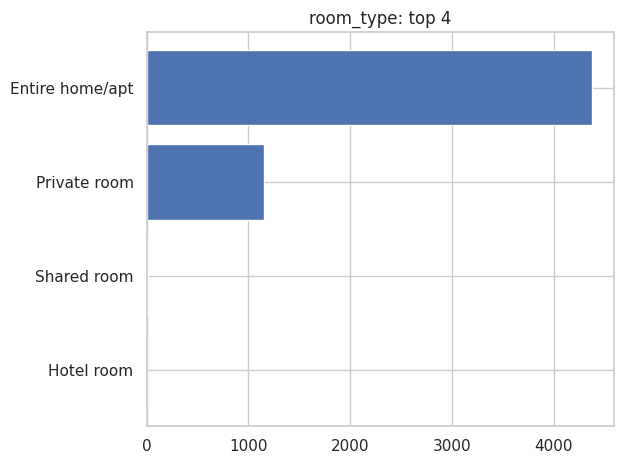

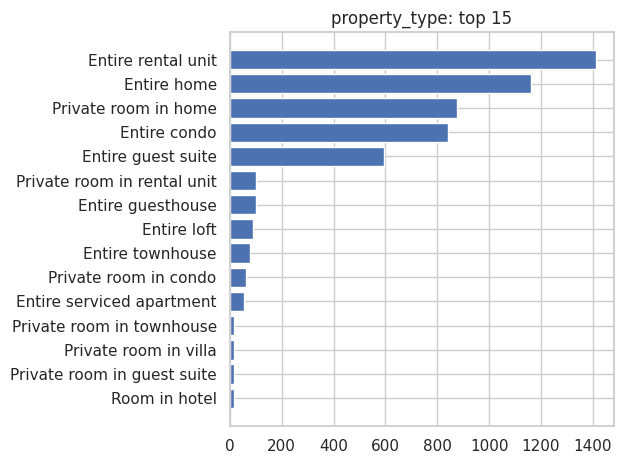

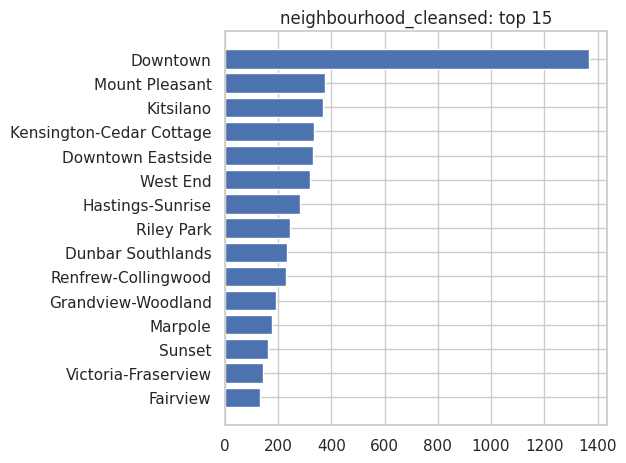

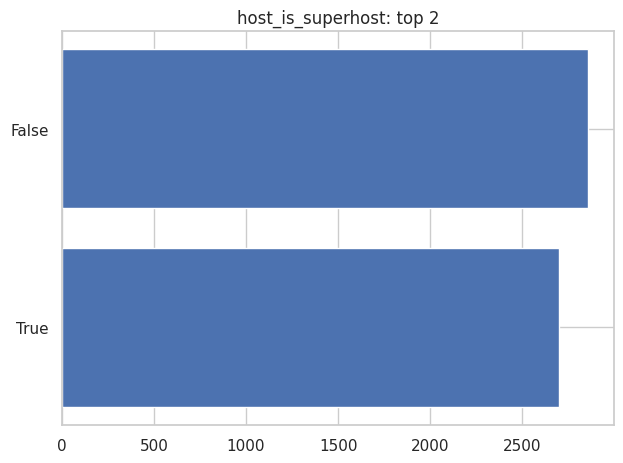

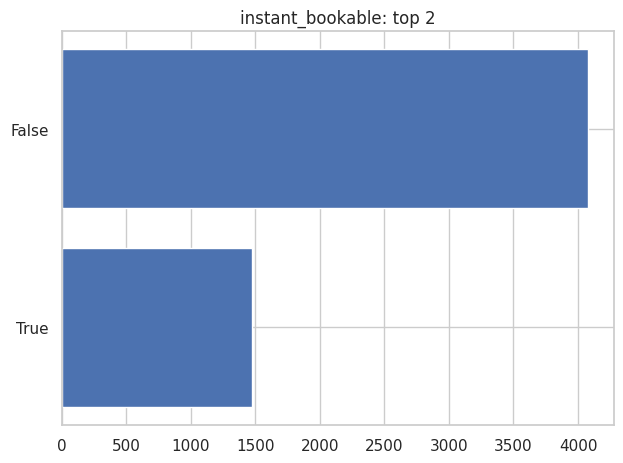

In [202]:
#Categorical columns to plot distributions for
for c in ['room_type','property_type','neighbourhood_cleansed','host_is_superhost','instant_bookable']:
    if c in df.columns:
        vc = topk_counts(df[c], 15)
        plt.figure()
        plt.barh(vc.index.astype(str), vc.values)
        save_show(f'{c}: top {len(vc)}')


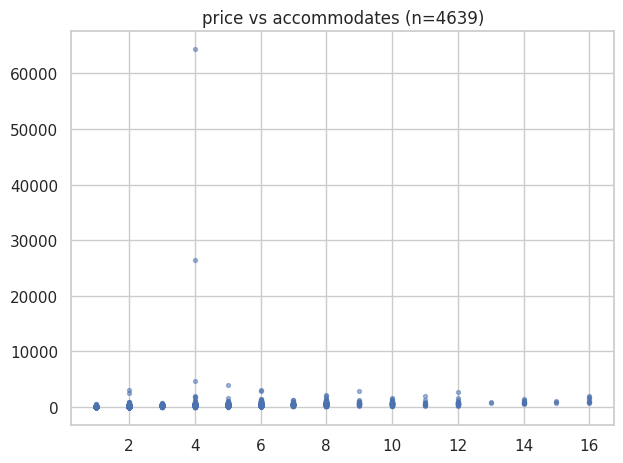

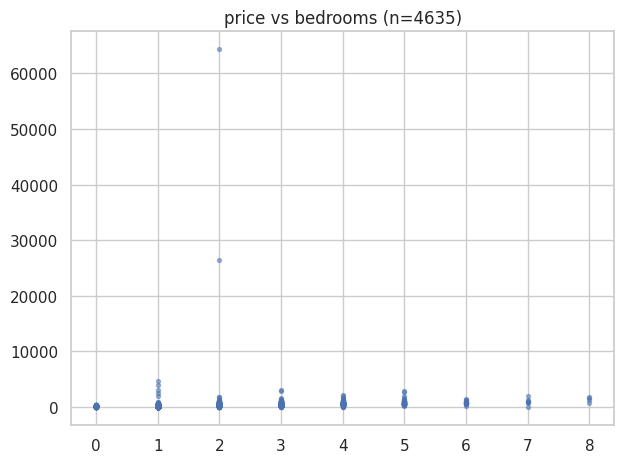

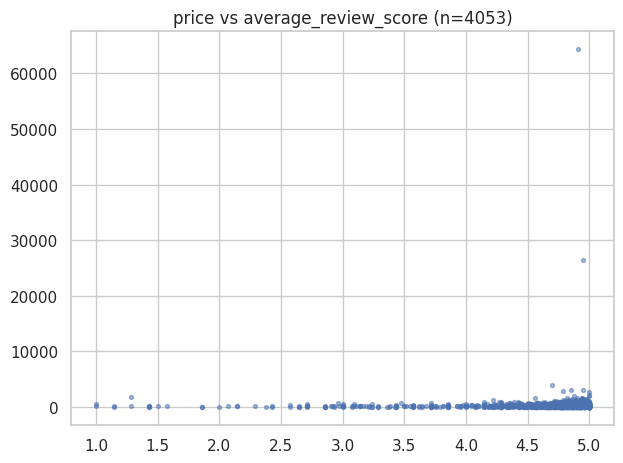

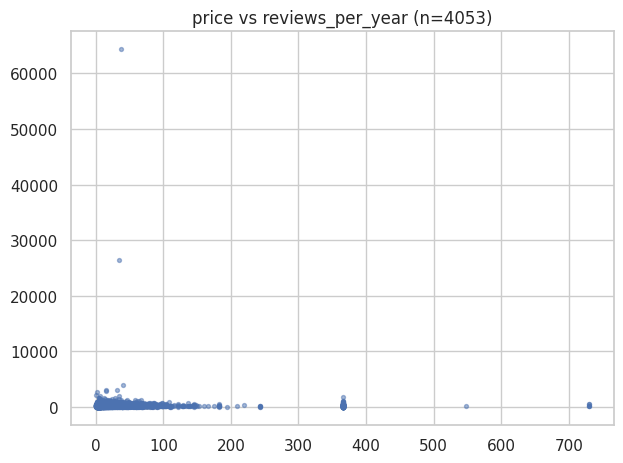

In [203]:
#Scatter plot for price and some numerical columns
pairs = [
    ('accommodates','price'),
    ('bedrooms','price'),
    ('average_review_score','price'),
    ('reviews_per_year','price')
]
for x,y in pairs:
    if x in df.columns and y in df.columns:
        d = df[[x,y]].dropna()
        plt.figure()
        plt.scatter(d[x], d[y], s=8, alpha=0.5)
        save_show(f'{y} vs {x} (n={len(d)})')


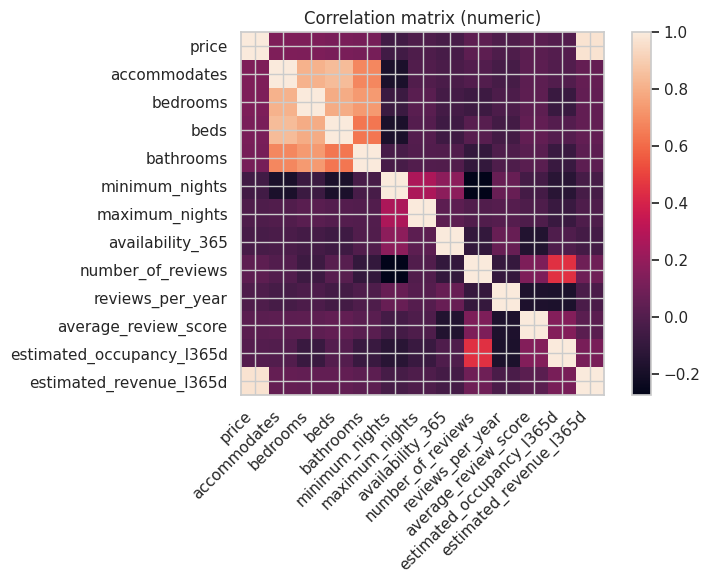

In [204]:
#Correlation Heatmap
focus = [c for c in [
    'price','accommodates','bedrooms','beds','bathrooms',
    'minimum_nights','maximum_nights','availability_365',
    'number_of_reviews','reviews_per_year','average_review_score',
    'estimated_occupancy_l365d','estimated_revenue_l365d'
] if c in df.columns]

corr = df[focus].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(focus)), focus, rotation=45, ha='right')
plt.yticks(range(len(focus)), focus)
plt.colorbar()
save_show('Correlation matrix (numeric)')


In [205]:
# Export cleaned data to CSV
df.to_csv('listings_cleaned.csv', index=False)

# Part 2 Additional Fixes. Dropping Nulls for host, location, prices, reviews (and also doing Encoding)

## Dealing With some extra Nulls

In [206]:
# % missing by column
na_rate = df.isna().mean().sort_values(ascending=False)
na_rate.head(20)

host_about                      0.498739
neighborhood_overview           0.495135
host_location                   0.232973
estimated_revenue_l365d         0.164144
price                           0.164144
bathrooms                       0.162883
beds                            0.162523
max_host_response_time_hours    0.150090
host_response_rate              0.150090
average_review_score            0.130811
reviews_per_year                0.130811
host_acceptance_rate            0.112793
host_neighbourhood              0.042703
bedrooms                        0.031532
description                     0.010991
bathrooms_text                  0.000721
host_total_listings_count       0.000360
host_since                      0.000360
host_id                         0.000000
name                            0.000000
dtype: float64

ooof. host_about and neighbourhood_overview has nearly 50% nulls!. host_location is also pretty high. Lets look at them

In [207]:
df['host_about'].unique()

array(['I love to travel with my family in comfort and enjoy the ethos and community spirit of AirBNB. I also host on AirBNB so travelers can enjoy staying with us in Vancouver!\nBon Voyage !!',
       'I am from Vancouver and in my free time I enjoy Yoga, Cycling and exploring the neighborhoods of my hometown.\nLove slow travel',
       nan, ...,
       'After graduating from the medical university, I chose to be a journalist. I have been to more than 30 countries in the world. I love art, especially interior design. I hope my home can give you the feeling of "feeling at home".',
       'Sally and I love to travel and have enjoyed hosting guests in other homes that we have lived in. This is our primary home but  We’re flexible hosts who spend time at our cabin, and can stay in our laneway home when needed — so we’re able to accommodate a variety of booking dates for our guests.',
       'Travel creates some of the most enjoyable moments in life.  I hope that wonderful new memories are

In [208]:
'''
I am going to replace nulls with 'No description provided' and then analyze the text to see if there are any common themes or keywords that can be extracted. This might help in understanding the type of hosts and their offerings better.

I will also create a column called host_has_about which will be a boolean indicating whether the host has provided a description or not. Will use this for analysis later.

'''

df['host_has_about'] = df['host_about'].notna().astype(bool)

df['host_about'] = df['host_about'].fillna('No description provided')

df['host_about'].unique()

array(['I love to travel with my family in comfort and enjoy the ethos and community spirit of AirBNB. I also host on AirBNB so travelers can enjoy staying with us in Vancouver!\nBon Voyage !!',
       'I am from Vancouver and in my free time I enjoy Yoga, Cycling and exploring the neighborhoods of my hometown.\nLove slow travel',
       'No description provided', ...,
       'After graduating from the medical university, I chose to be a journalist. I have been to more than 30 countries in the world. I love art, especially interior design. I hope my home can give you the feeling of "feeling at home".',
       'Sally and I love to travel and have enjoyed hosting guests in other homes that we have lived in. This is our primary home but  We’re flexible hosts who spend time at our cabin, and can stay in our laneway home when needed — so we’re able to accommodate a variety of booking dates for our guests.',
       'Travel creates some of the most enjoyable moments in life.  I hope that wond

In [209]:
print(df[['host_about', 'host_has_about']].head())

                                          host_about  host_has_about
0  I love to travel with my family in comfort and...            True
1  I am from Vancouver and in my free time I enjo...            True
2                            No description provided           False
3  In my spare time I am pretty active - currentl...            True
4  We - Alexis and Sylvain - are the Artistic Dir...            True


## Neighbourhood Overview

In [210]:
df['neighborhood_overview'].unique()

array(['The uber hip Main street area is a short walk of 6 minutes to the east.  Dozens of dining options.  Great supermarkets, butcher ,cafe, pub, tiki lounge, ethnic restaurants of all sorts.  Sprinkled with antique stores and retro clothing stores.  To the West, just down the hill from the Canada Line station at King Edward is Cambie Village, theatre, flamenco dancing, fine dining, ice cream and more.',
       "2 blocks away from the shopping area of Robson Street.<br />A short walk away to Trendy Yaletown with all its cafes, restaurants, waterfront seawall access. It's also an easy stroll to catch the aqua bus to Granville Island for fresh food shopping at the public market.",
       'Next block to Commercial Drive which has many buses, shops, restaurants, doctors, coffee shops, banks',
       ...,
       "🌿 Live by the Lake – Nature, Culture & Convenience in East Vancouver<br />Just a short walk from the beautiful Trout Lake (John Hendry Park), our home offers the rare charm of la

In [211]:
'''
I am going to replace nulls with 'No description provided' and then analyze the text to see if there are any common themes or keywords that can be extracted. This might help in later determining if the lack of descriptions affect listings' performance.

I am also going to create a column called neighborhood_has_overview which will be a boolean indicating whether the neighborhood overview has been provided or not. Will use this for analysis later.

'''

df['neighborhood_has_overview'] = df['neighborhood_overview'].notna().astype(bool)

df['neighborhood_overview'] = df['neighborhood_overview'].fillna('No description provided')
df['neighborhood_overview'].unique()

array(['The uber hip Main street area is a short walk of 6 minutes to the east.  Dozens of dining options.  Great supermarkets, butcher ,cafe, pub, tiki lounge, ethnic restaurants of all sorts.  Sprinkled with antique stores and retro clothing stores.  To the West, just down the hill from the Canada Line station at King Edward is Cambie Village, theatre, flamenco dancing, fine dining, ice cream and more.',
       "2 blocks away from the shopping area of Robson Street.<br />A short walk away to Trendy Yaletown with all its cafes, restaurants, waterfront seawall access. It's also an easy stroll to catch the aqua bus to Granville Island for fresh food shopping at the public market.",
       'Next block to Commercial Drive which has many buses, shops, restaurants, doctors, coffee shops, banks',
       ...,
       "🌿 Live by the Lake – Nature, Culture & Convenience in East Vancouver<br />Just a short walk from the beautiful Trout Lake (John Hendry Park), our home offers the rare charm of la

In [212]:
print(df[['neighborhood_overview', 'neighborhood_has_overview']].head())

                               neighborhood_overview  \
0  The uber hip Main street area is a short walk ...   
1  2 blocks away from the shopping area of Robson...   
2  Next block to Commercial Drive which has many ...   
3  Lots of restaurants, coffee shops.<br />Easy a...   
4  Lots of restaurants and boutiques just outside...   

   neighborhood_has_overview  
0                       True  
1                       True  
2                       True  
3                       True  
4                       True  


## host_location nulls

In [213]:
df['host_location'].unique()

array(['Vancouver, Canada', nan, 'Richmond, Canada', 'Abbotsford, Canada',
       'Lethbridge, Canada', 'West Vancouver, Canada',
       'Stuttgart, Germany', 'Toronto, Canada', 'New Orleans, LA',
       'Los Angeles, CA', 'West Hollywood, CA', 'Seattle, WA',
       'Fontainebleau, France', 'Regina, Canada', 'Pemberton, Canada',
       'British Columbia, Canada', 'Montreal, Canada', 'Gibsons, Canada',
       'Coquitlam, Canada', 'Whistler, Canada', 'Las Vegas, NV',
       'United States', 'Tokyo, Japan', 'Burnaby, Canada',
       'San Francisco, CA', 'Cobble Hill, Canada', 'Sliema, Malta',
       'Taiwan', 'New Boston, NH', 'New Westminster, Canada', 'Canada',
       'Halfmoon Bay, Canada', 'Valencia, Spain', 'Calgary, Canada',
       'Squamish, Canada', 'Kingston, Canada', 'Surrey, Canada',
       'Honolulu, HI', 'North Vancouver, Canada',
       'Frankston South, Australia', 'Victoria, Canada',
       'Melbourne, Australia', 'Port Moody, Canada', 'Mendoza, Argentina',
       'Seongna

In [214]:
'''
Replace with nulls with 'No location provided'

I will also create a column called host_location_provided which will be a boolean indicating whether the host has provided a location or not. Will use this for analysis later.

'''

df['host_location_provided'] = df['host_location'].notna().astype(bool)

df['host_location'] = df['host_location'].fillna('No location provided')
df['host_location'].unique()

array(['Vancouver, Canada', 'No location provided', 'Richmond, Canada',
       'Abbotsford, Canada', 'Lethbridge, Canada',
       'West Vancouver, Canada', 'Stuttgart, Germany', 'Toronto, Canada',
       'New Orleans, LA', 'Los Angeles, CA', 'West Hollywood, CA',
       'Seattle, WA', 'Fontainebleau, France', 'Regina, Canada',
       'Pemberton, Canada', 'British Columbia, Canada',
       'Montreal, Canada', 'Gibsons, Canada', 'Coquitlam, Canada',
       'Whistler, Canada', 'Las Vegas, NV', 'United States',
       'Tokyo, Japan', 'Burnaby, Canada', 'San Francisco, CA',
       'Cobble Hill, Canada', 'Sliema, Malta', 'Taiwan', 'New Boston, NH',
       'New Westminster, Canada', 'Canada', 'Halfmoon Bay, Canada',
       'Valencia, Spain', 'Calgary, Canada', 'Squamish, Canada',
       'Kingston, Canada', 'Surrey, Canada', 'Honolulu, HI',
       'North Vancouver, Canada', 'Frankston South, Australia',
       'Victoria, Canada', 'Melbourne, Australia', 'Port Moody, Canada',
       'Mendoza, A

In [215]:
print(df[['neighborhood_overview', 'neighborhood_has_overview']].head())

                               neighborhood_overview  \
0  The uber hip Main street area is a short walk ...   
1  2 blocks away from the shopping area of Robson...   
2  Next block to Commercial Drive which has many ...   
3  Lots of restaurants, coffee shops.<br />Easy a...   
4  Lots of restaurants and boutiques just outside...   

   neighborhood_has_overview  
0                       True  
1                       True  
2                       True  
3                       True  
4                       True  


## Price and Estimated Revenue Nulls

In [216]:
'''
Since price and estimated revenue and reviews are crucial for our analysis, I will drop rows where either of these columns have null values. This will ensure that our dataset is complete for any financial analysis we plan to conduct.
'''
df = df.dropna(subset=['price', 'estimated_revenue_l365d', 'average_review_score', 'reviews_per_year'])
df.shape

(4053, 41)

# Bonus Experimentation and stats. (DONT SHOW PROF unless I have a solid understanding of the stats)

In [217]:
# % missing by column
na_rate = df.isna().mean().sort_values(ascending=False)
na_rate.head(20)

host_response_rate              0.068098
max_host_response_time_hours    0.068098
host_neighbourhood              0.040464
host_acceptance_rate            0.035036
description                     0.008142
bathrooms_text                  0.000740
host_since                      0.000493
host_total_listings_count       0.000493
bathrooms                       0.000493
bedrooms                        0.000247
beds                            0.000247
host_about                      0.000000
host_location                   0.000000
name                            0.000000
id                              0.000000
neighborhood_overview           0.000000
host_id                         0.000000
latitude                        0.000000
neighbourhood_cleansed          0.000000
host_identity_verified          0.000000
dtype: float64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4053 entries, 0 to 5536
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            4053 non-null   int64         
 1   name                          4053 non-null   object        
 2   description                   4020 non-null   object        
 3   neighborhood_overview         4053 non-null   object        
 4   host_id                       4053 non-null   int64         
 5   host_since                    4051 non-null   datetime64[ns]
 6   host_location                 4053 non-null   object        
 7   host_about                    4053 non-null   object        
 8   host_response_rate            3777 non-null   float64       
 9   host_acceptance_rate          3911 non-null   float64       
 10  host_is_superhost             4053 non-null   bool          
 11  host_neighbourhood            3889 

### Some experimentation with encoding (Don't show PROF)

In [219]:
card = df.nunique(dropna=False).sort_values(ascending=False)
print(card)


id                              4053
name                            4008
amenities                       3978
description                     3706
longitude                       3608
latitude                        3421
reviews_per_year                3292
host_id                         2865
estimated_revenue_l365d         2299
host_since                      2164
neighborhood_overview           1915
host_about                      1377
average_review_score             728
price                            724
number_of_reviews                393
availability_365                 366
maximum_nights                   110
estimated_occupancy_l365d         80
host_acceptance_rate              75
host_neighbourhood                69
host_total_listings_count         66
host_location                     58
property_type                     44
host_response_rate                35
minimum_nights                    32
bathrooms_text                    23
neighbourhood_cleansed            23
a

In [220]:
cat_cols = df.select_dtypes(include=['object','category','bool']).columns

for c in cat_cols:
    print(f'\n=== {c} | dtype={df[c].dtype} | nunique={df[c].nunique(dropna=False)} ===')
    print(df[c].value_counts(dropna=False).head(15))



=== name | dtype=object | nunique=4008 ===
name
Warm Room In Shaughnessy                        4
Bright & Spacious Loft | Office & AC            2
08                                              2
g2b                                             2
Stunning Gastown Loft! 1200 sq ft & King Bed    2
Vancouver, Dundas St, Room on upstairs, U1      2
Coal Harbour Luxury Apartment                   2
26-1 Basement room                              2
Cozy Studio in Mount Pleasant                   2
Downtown single room near beach                 2
Private Spacious Room w/ Queen Bed Near UBC     2
Heart of Downtown Vancouver                     2
g1                                              2
Condo in Downtown Vancouver                     2
11-3                                            2
Name: count, dtype: int64

=== description | dtype=object | nunique=3706 ===
description
Enjoy easy access to everything from this perfectly located home base.                                          

In [221]:
def summarize_uniques(df, cols=None, top=10):
    import pandas as pd
    if cols is None:
        cols = list(df.columns)
    else:
        cols = list(cols)  # ensure list, not Index
    rows = []
    for c in cols:
        vc = df[c].value_counts(dropna=False)
        rows.append({
            'column': c,
            'dtype': str(df[c].dtype),
            'nunique': df[c].nunique(dropna=False),
            'top_values': ', '.join(f'{k}:{int(v)}' for k,v in vc.head(top).items())
        })
    return pd.DataFrame(rows).sort_values('nunique', ascending=False)

summary = summarize_uniques(df, top=5)
print(summary)


                          column           dtype  nunique  \
0                             id           int64     4053   
1                           name          object     4008   
25                     amenities          object     3978   
2                    description          object     3706   
17                     longitude         float64     3608   
16                      latitude         float64     3421   
36              reviews_per_year         float64     3292   
4                        host_id           int64     2865   
33       estimated_revenue_l365d         float64     2299   
5                     host_since  datetime64[ns]     2164   
3          neighborhood_overview          object     1915   
7                     host_about          object     1377   
35          average_review_score         float64      728   
26                         price         float64      724   
31             number_of_reviews           int64      393   
30              availabi

In [222]:
card = df.nunique(dropna=False)
suggest = []
for c in df.columns:
    k = card[c]
    dt = df[c].dtype
    if dt == 'bool':
        enc = 'keep as 0/1'
    elif np.issubdtype(dt, np.number) or np.issubdtype(dt, np.datetime64):
        enc = 'numeric (no encoding)'
    elif k <= 30:
        enc = 'OneHotEncoder'
    elif k <= 80:
        enc = 'top-K OHE or Frequency'
    else:
        enc = 'text proxy (len/words) or target/freq/hash'
    suggest.append((c, k, str(dt), enc))
pd.DataFrame(suggest, columns=['column','nunique','dtype','suggested_encoding']).sort_values('nunique', ascending=False).head(20)


column  nunique           dtype  \
0                          id     4053           int64   
1                        name     4008          object   
25                  amenities     3978          object   
2                 description     3706          object   
17                  longitude     3608         float64   
16                   latitude     3421         float64   
36           reviews_per_year     3292         float64   
4                     host_id     2865           int64   
33    estimated_revenue_l365d     2299         float64   
5                  host_since     2164  datetime64[ns]   
3       neighborhood_overview     1915          object   
7                  host_about     1377          object   
35       average_review_score      728         float64   
26                      price      724         float64   
31          number_of_reviews      393           int64   
30           availability_365      366           int64   
28             maximum_nights      110           int64   
32  estimated_occupancy_l365d       80           int64   
9        host_acceptance_rate       75         float64   
11         host_neighbourhood       69          object   

                            suggested_encoding  
0                        numeric (no encoding)  
1   text proxy (len/words) or target/freq/hash  
25  text proxy (len/words) or target/freq/hash  
2   text proxy (len/words) or target/freq/hash  
17                       numeric (no encoding)  
16                       numeric (no encoding)  
36                       numeric (no encoding)  
4                        numeric (no encoding)  
33                       numeric (no encoding)  
5                        numeric (no encoding)  
3   text proxy (len/words) or target/freq/hash  
7   text proxy (len/words) or target/freq/hash  
35                       numeric (no encoding)  
26                       numeric (no encoding)  
31                       numeric (no encoding)  
30                       numeric (no encoding)  
28                       numeric (no encoding)  
32                       numeric (no encoding)  
9                        numeric (no encoding)  
11                      top-K OHE or Frequency

In [223]:
#Time to drop some stuff.

#has_availability is not very useful since it is almost always True. I guess I am also dropping id and host_id since they are unique identifiers and won't help in analysis.
#df.drop(columns=['has_availability', 'id', 'host_id'], inplace=True)
df.drop(columns=['has_availability', 'host_id'], inplace=True)



# 3. More Graphing and Visualization

## Outlier Graph

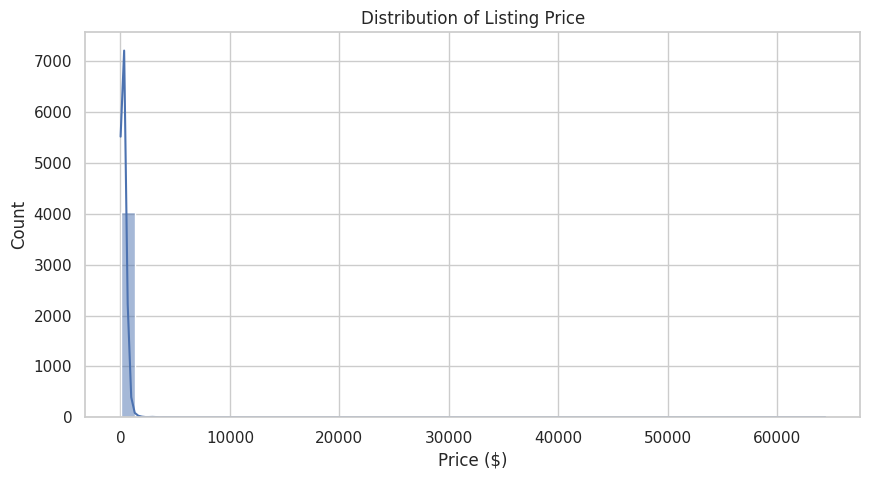

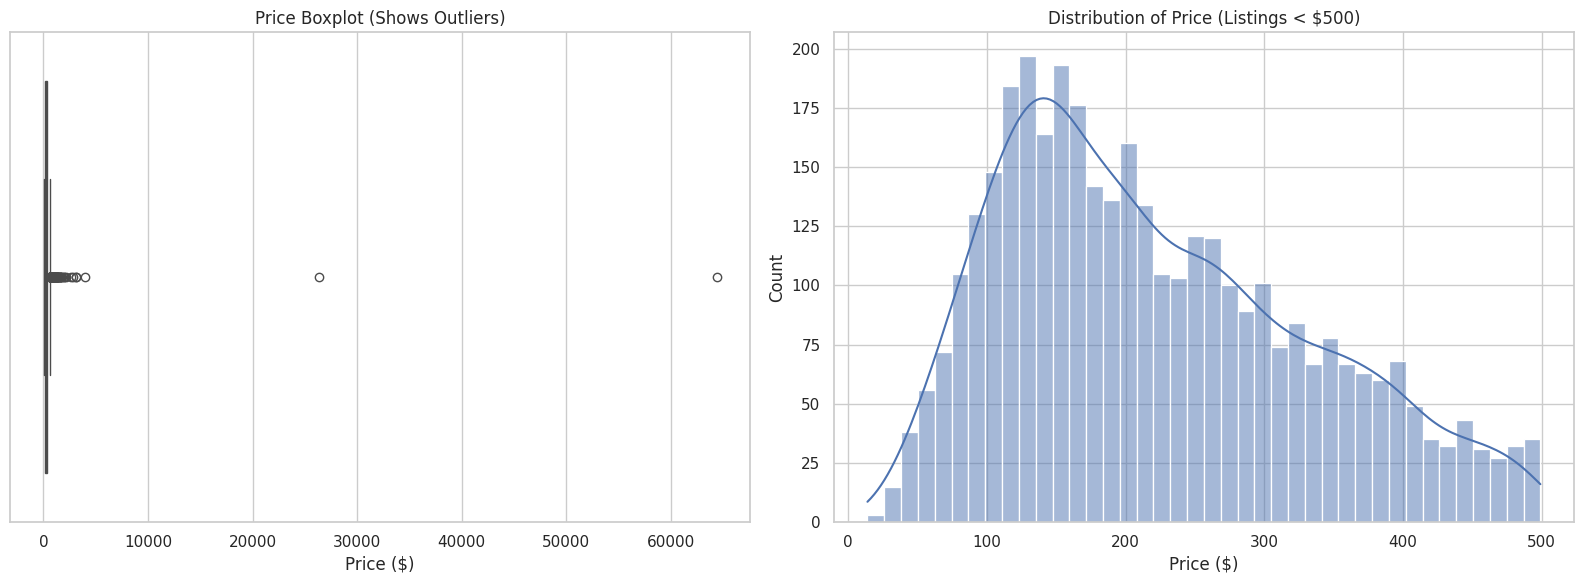

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Price')
plt.xlabel('Price ($)')
plt.show()

# Possible outliers. Likely Right skewed distribution.


fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 cols

# Boxplot to clearly see outliers
sns.boxplot(x=df['price'], ax=axes[0])
axes[0].set_title('Price Boxplot (Shows Outliers)')
axes[0].set_xlabel('Price ($)')

# Filtered histogram for a better view
filtered_price = df[df['price'] < 500]['price'] # Filter to listings under $500
sns.histplot(filtered_price, bins=40, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Price (Listings < $500)')
axes[1].set_xlabel('Price ($)')

plt.tight_layout()
plt.show()

## Price Distribution

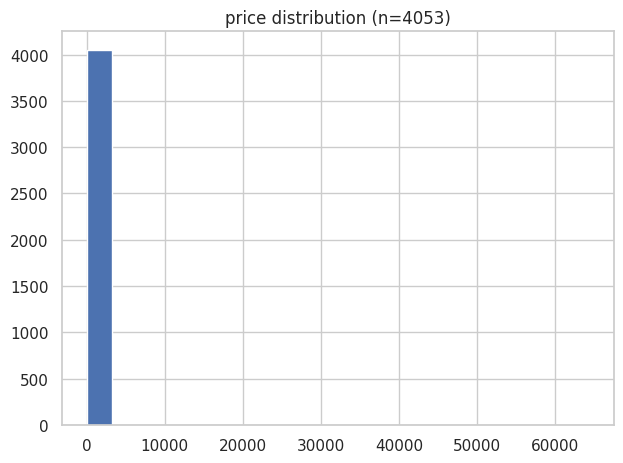

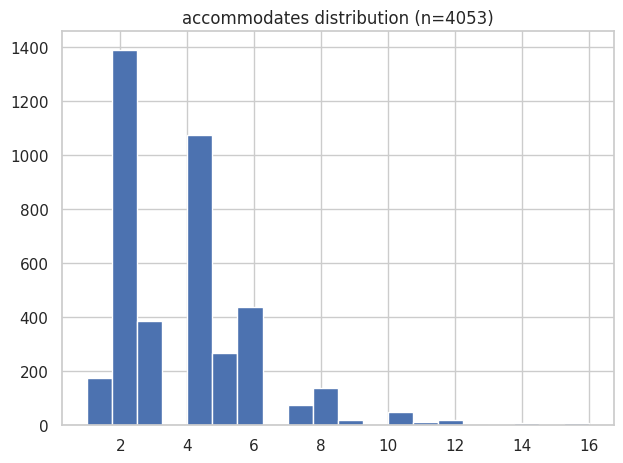

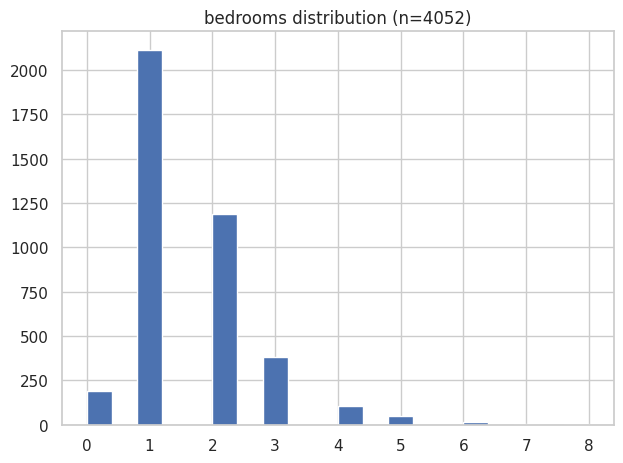

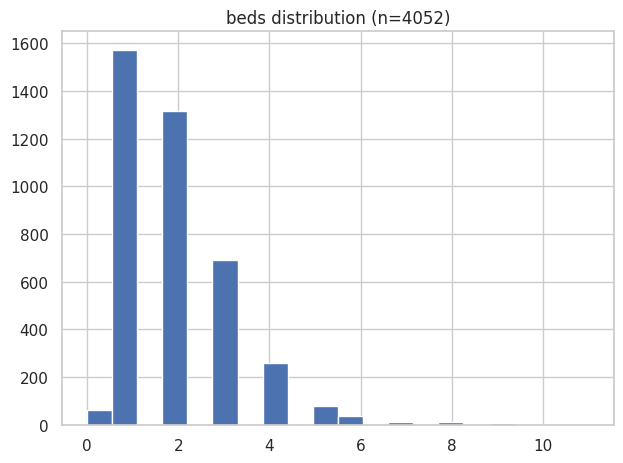

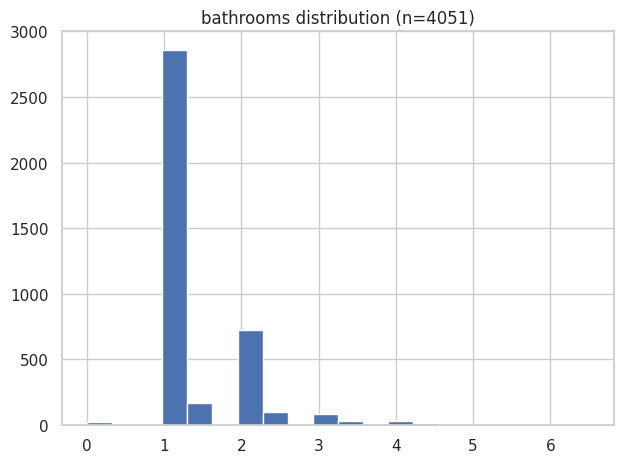

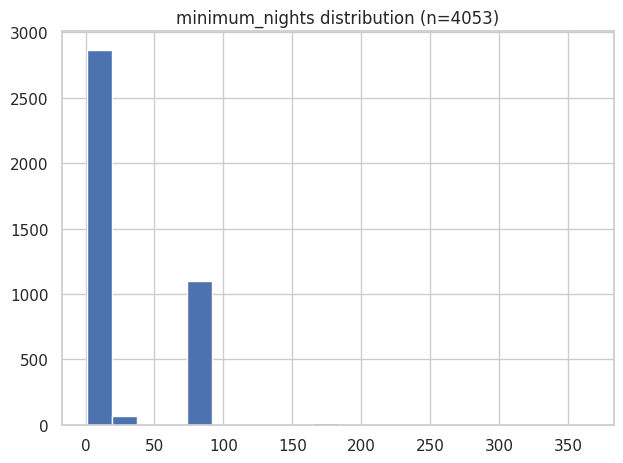

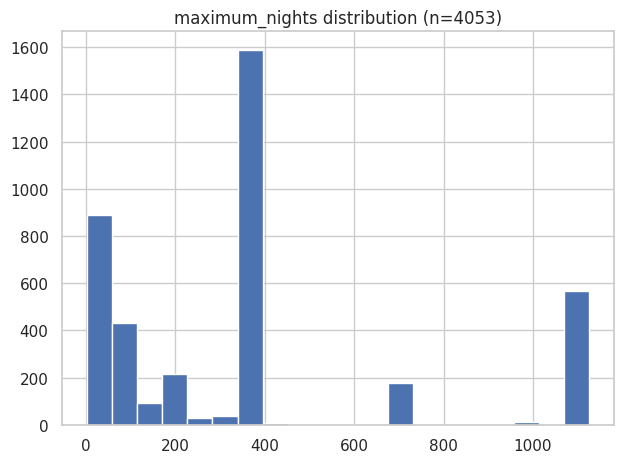

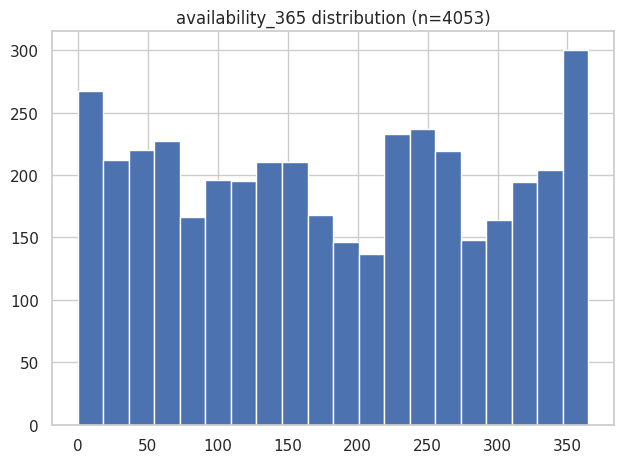

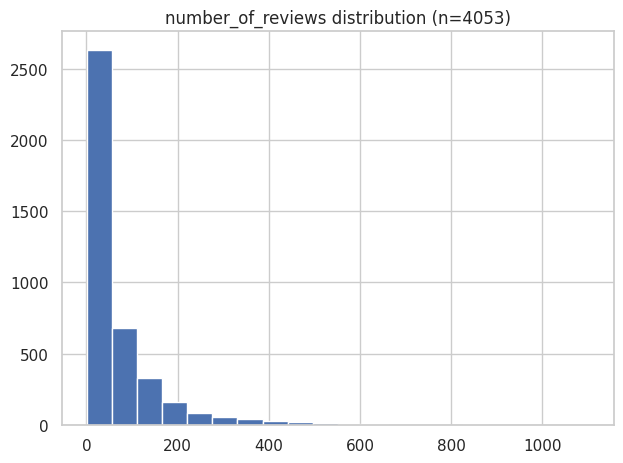

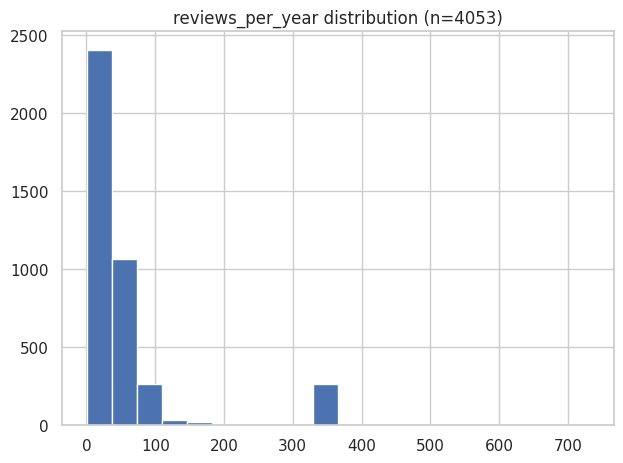

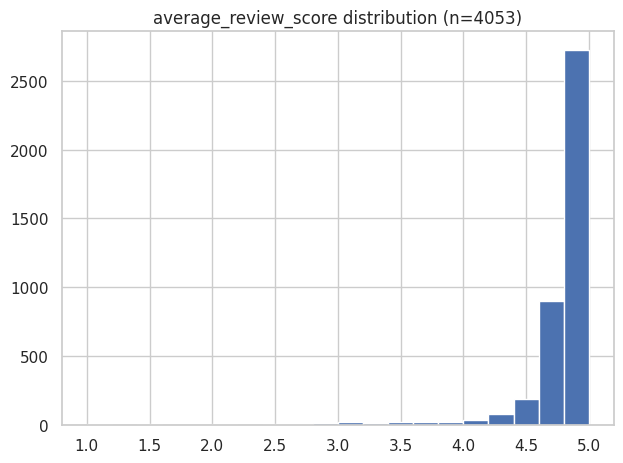

In [225]:
# Numerical columns to plot distributions for

num_cols = ['price','accommodates','bedrooms','beds','bathrooms',
            'minimum_nights','maximum_nights','availability_365',
            'number_of_reviews','reviews_per_year','average_review_score']

for c in [x for x in num_cols if x in df.columns]:
    s = df[c].dropna()
    plt.figure()
    plt.hist(s, bins=20)
    save_show(f'{c} distribution (n={len(s)})')

## Categorical Columns to Plot Distributions for

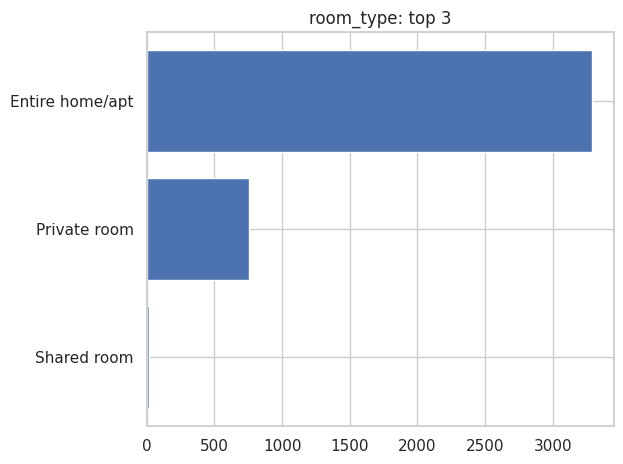

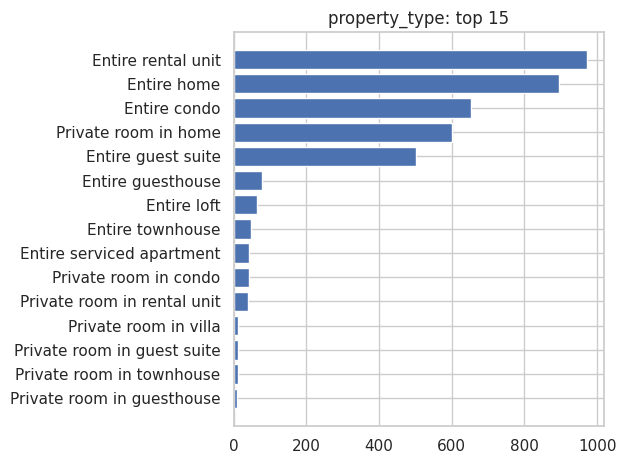

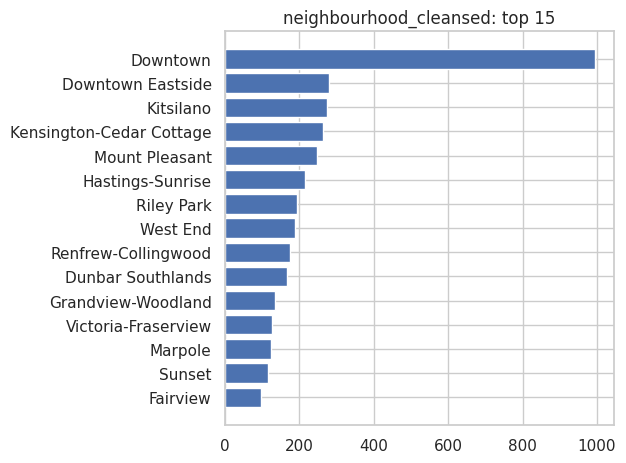

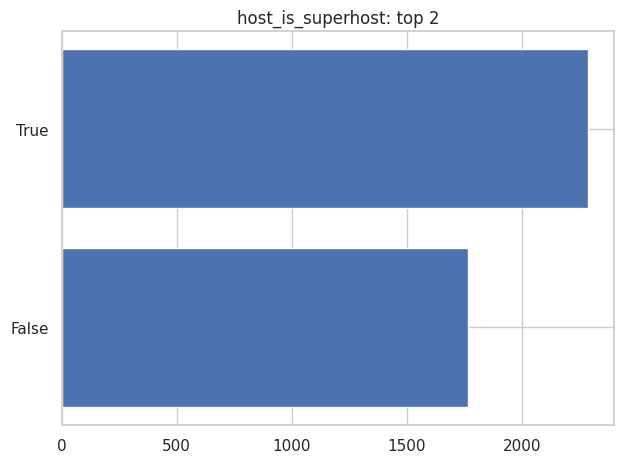

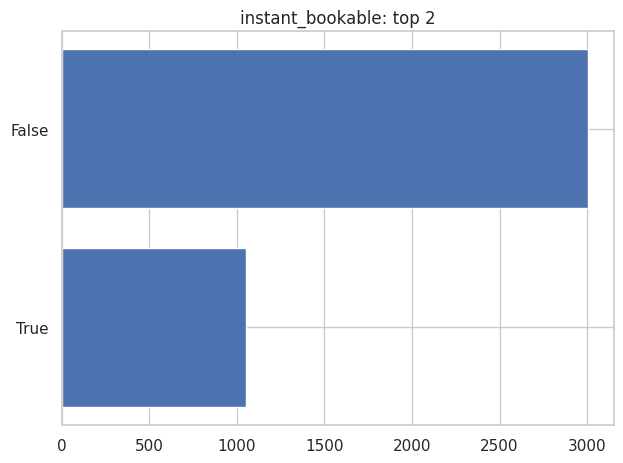

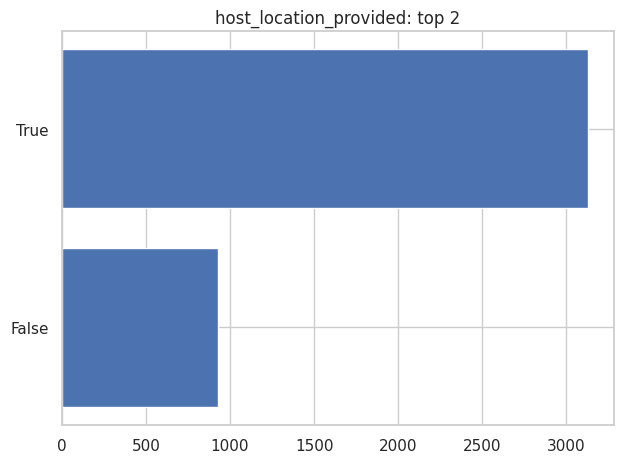

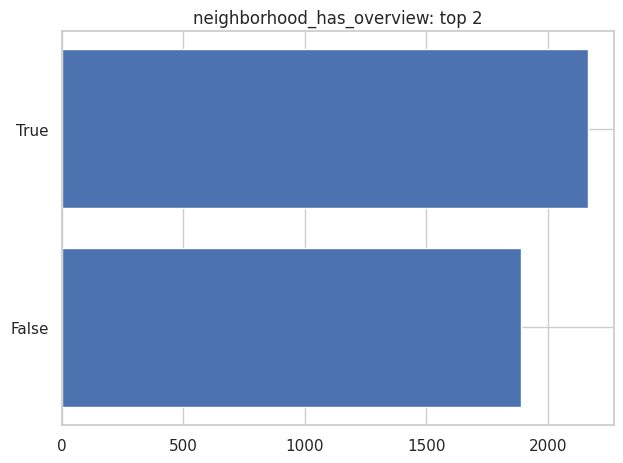

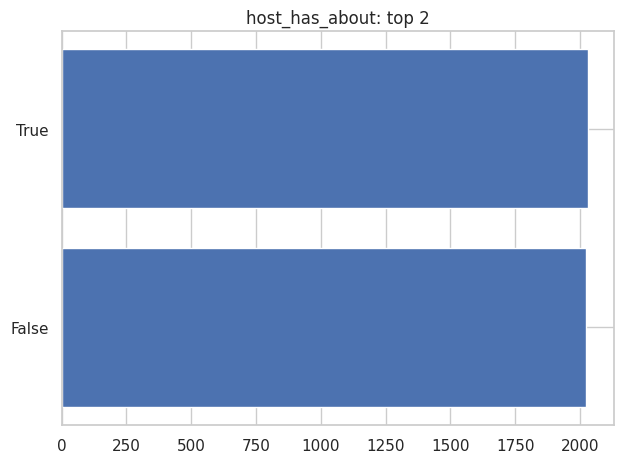

In [226]:
#Categorical columns to plot distributions for
for c in ['room_type','property_type','neighbourhood_cleansed','host_is_superhost','instant_bookable', 'host_location_provided', 'neighborhood_has_overview', 'host_has_about']:
    if c in df.columns:
        vc = topk_counts(df[c], 15)
        plt.figure()
        plt.barh(vc.index.astype(str), vc.values)
        save_show(f'{c}: top {len(vc)}')

## Scatter plot for price and some numerical columns

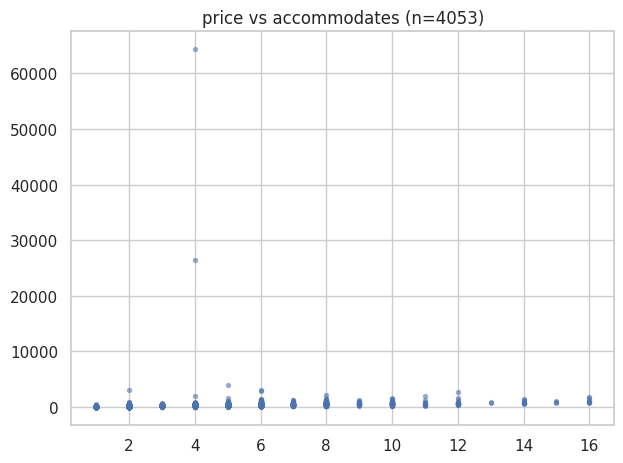

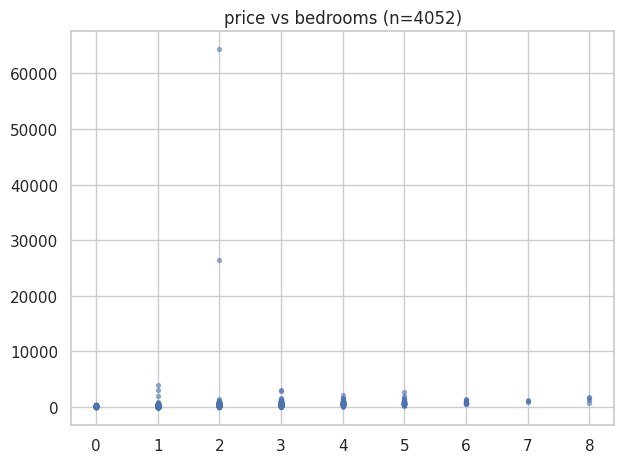

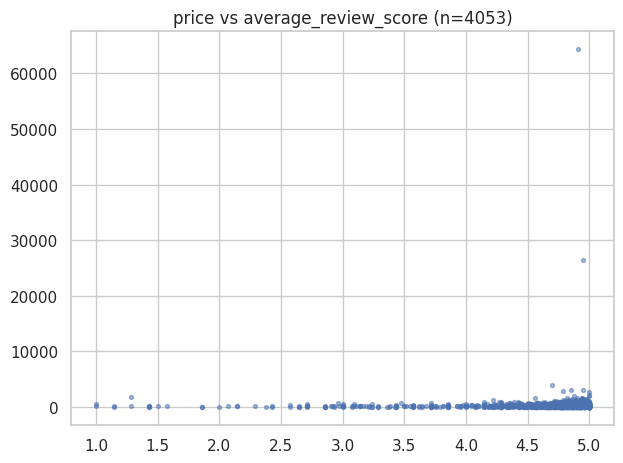

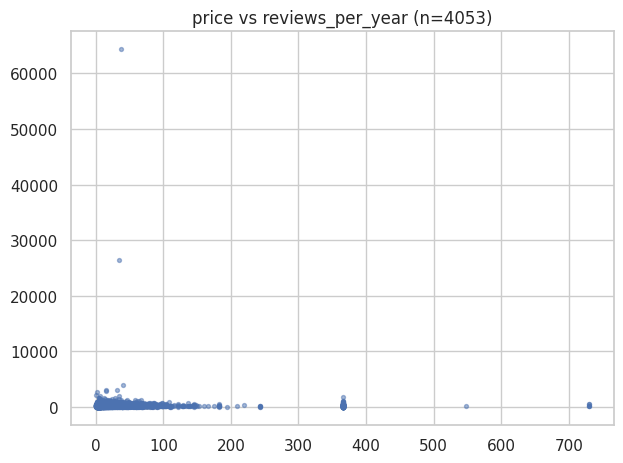

In [227]:
#Scatter plot for price and some numerical columns
pairs = [
    ('accommodates','price'),
    ('bedrooms','price'),
    ('average_review_score','price'),
    ('reviews_per_year','price')
]
for x,y in pairs:
    if x in df.columns and y in df.columns:
        d = df[[x,y]].dropna()
        plt.figure()
        plt.scatter(d[x], d[y], s=8, alpha=0.5)
        save_show(f'{y} vs {x} (n={len(d)})')


## Correlation Heatmap

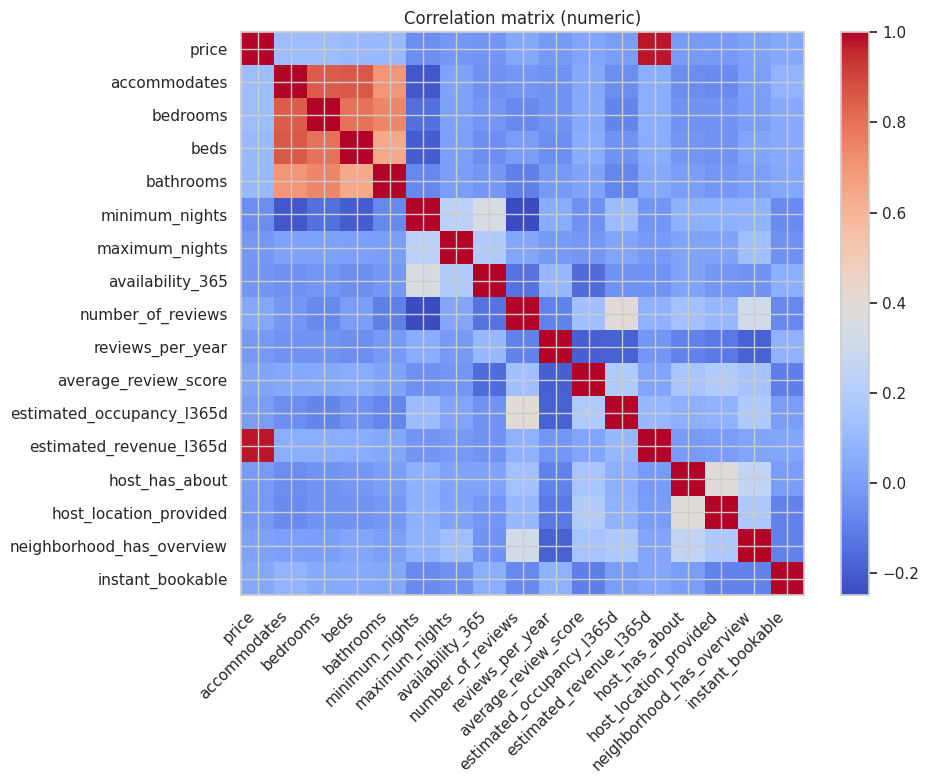

In [228]:
#Correlation Heatmap
focus = [c for c in [
    'price','accommodates','bedrooms','beds','bathrooms',
    'minimum_nights','maximum_nights','availability_365',
    'number_of_reviews','reviews_per_year','average_review_score',
    'estimated_occupancy_l365d','estimated_revenue_l365d', 'host_has_about', 'host_location_provided', 'neighborhood_has_overview', 'instant_bookable'
] if c in df.columns]

corr = df[focus].corr()
#Make plots larger for readability
plt.figure(figsize=(10,8))
#Change color map to 'coolwarm' for better visibility
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.xticks(range(len(focus)), focus, rotation=45, ha='right')
plt.yticks(range(len(focus)), focus)
plt.colorbar()


#Change colorbar to reflect new colormap
#plt.colorbar()
save_show('Correlation matrix (numeric)')


### Experimental Heatmap. (DONT SHOW PROF)

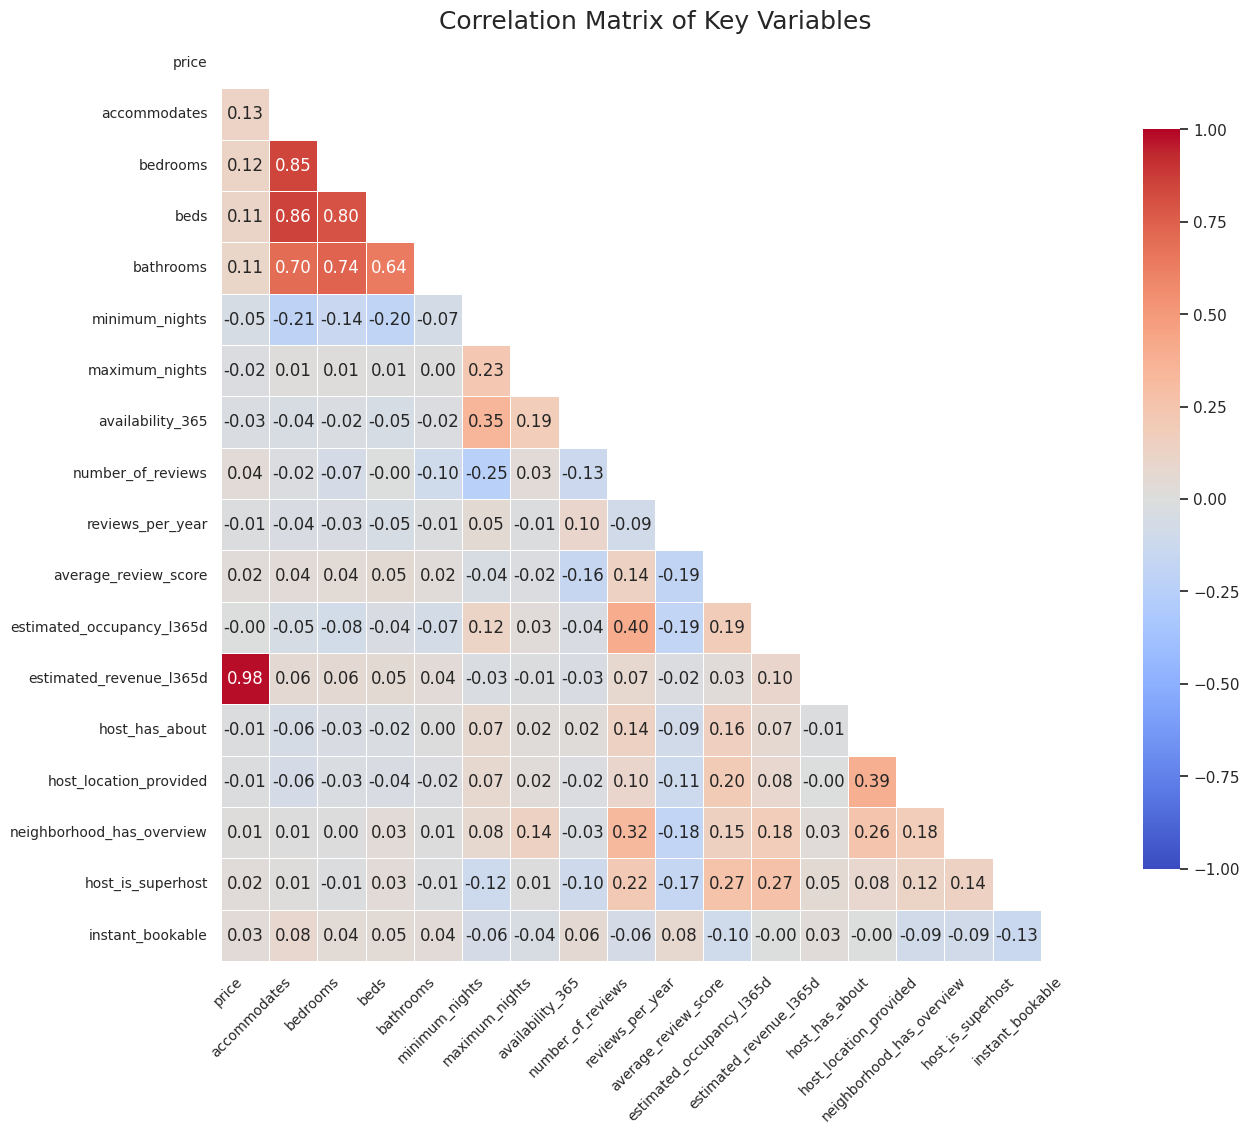

In [229]:
# Different heatmap.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a professional looking style
sns.set_theme(style="white")

# Define the focus columns, including your new boolean columns
focus_cols = [
    'price', 'accommodates', 'bedrooms', 'beds', 'bathrooms',
    'minimum_nights', 'maximum_nights', 'availability_365',
    'number_of_reviews', 'reviews_per_year', 'average_review_score',
    'estimated_occupancy_l365d', 'estimated_revenue_l365d',
    'host_has_about', 'host_location_provided', 'neighborhood_has_overview',
    'host_is_superhost', 'instant_bookable'
]

# Ensure all focus_cols exist in the DataFrame before proceeding
# This is a good practice to avoid errors if a column is missing
existing_focus_cols = [col for col in focus_cols if col in df.columns]

# Calculate the correlation matrix
corr = df[existing_focus_cols].corr()

# Create a mask for the upper triangle
# This helps remove redundant information since the matrix is symmetrical
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12)) # Increase figure size for better readability
sns.heatmap(
    corr,
    mask=mask,               # Apply the mask to hide the upper triangle
    annot=True,              # Show the correlation values on the heatmap
    fmt=".2f",               # Format annotations to two decimal places
    cmap='coolwarm',         # Choose a diverging colormap
    vmin=-1, vmax=1,         # Ensure the color scale goes from -1 to 1
    linewidths=.5,           # Add lines between cells for clarity
    cbar_kws={"shrink": .8}  # Shrink color bar to fit
)
plt.title('Correlation Matrix of Key Variables', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)             # Keep y-axis labels horizontal
plt.show()

# 4. Statistical Analysis

## Difference between host and superhost prices

In [230]:
from scipy import stats

#Statsistical Analysis. Difference between host and superhost prices

# 1. Create two separate groups
superhost_prices = df[df['host_is_superhost'] == True]['price']
host_prices = df[df['host_is_superhost'] == False]['price']

# 2. Perform the two-sample T-test
# We set equal_var=False because the two groups might have different variances
t_stat, p_value = stats.ttest_ind(superhost_prices, host_prices, equal_var=False)

print(f"--- Superhost Price T-Test ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpret the result
alpha = 0.05 # Standard significance level
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in prices between superhosts and regular hosts.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in prices between superhosts and regular hosts.")

--- Superhost Price T-Test ---
T-statistic: 1.7520
P-value: 0.0799
Result: Fail to reject the null hypothesis. No significant difference in prices between superhosts and regular hosts.


## Chi Square. Association Between host_is_superhost and istant_bookable

In [231]:
# Hypothesis test 2: Chi-Square test. Assocation between host_is_superhost and instant_bookable
# Create a contingency table
contingency_table = pd.crosstab(df['host_is_superhost'], df['instant_bookable'])


#Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpret the result
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than {alpha}.")
    print("We reject the null hypothesis: There IS a significant association.")
else:
    print(f"The p-value ({p_value:.4f}) is greater than {alpha}.")
    print("We fail to reject the null hypothesis: There is NO significant association.")


Chi-squared statistic: 71.5490
P-value: 0.0000
The p-value (0.0000) is less than 0.05.
We reject the null hypothesis: There IS a significant association.


## Confidence Intervals. 95% CI for average review score of all listings!

In [232]:
# 1. Get the data and key stats
scores = df['average_review_score'].dropna()
mean_score = scores.mean()
sem_score = scores.sem() # Standard Error of the Mean
confidence = 0.95
degrees_freedom = len(scores) - 1

# 2. Calculate the confidence interval
ci = stats.t.interval(
    confidence,
    degrees_freedom,
    loc=mean_score,
    scale=sem_score
)

print(f"\n--- 95% Confidence Interval for Average Review Score ---")
print(f"Mean Score: {mean_score:.3f}")
print(f"Confidence Interval: ({ci[0]:.3f}, {ci[1]:.3f})")
print(f"We are 95% confident that the true average review score for all listings is between {ci[0]:.3f} and {ci[1]:.3f}.")


--- 95% Confidence Interval for Average Review Score ---
Mean Score: 4.775
Confidence Interval: (4.764, 4.786)
We are 95% confident that the true average review score for all listings is between 4.764 and 4.786.


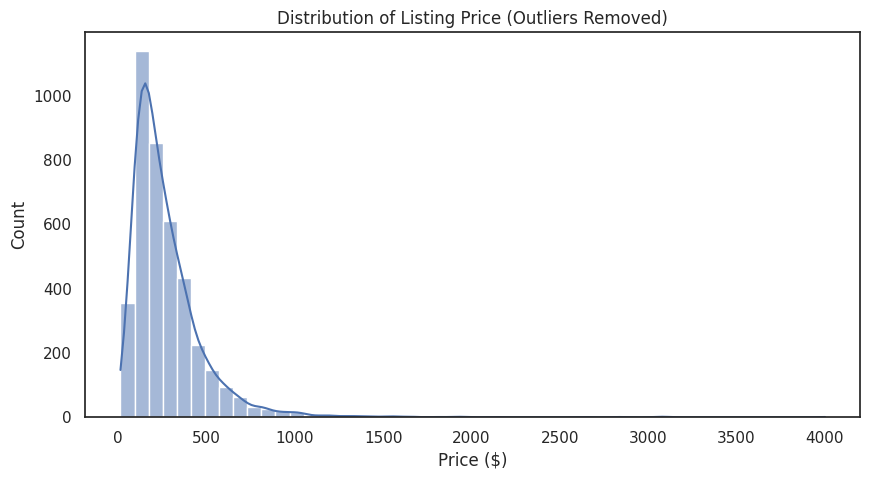

In [233]:
# For price related analysis, filter out extreme outliers. Remove anything more than 20000

df = df[df['price'] < 20000]

#Quick graph to see effect of outlier removal
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Price (Outliers Removed)')
plt.xlabel('Price ($)')
plt.show()

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 0 to 5536
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            4051 non-null   int64         
 1   name                          4051 non-null   object        
 2   description                   4018 non-null   object        
 3   neighborhood_overview         4051 non-null   object        
 4   host_since                    4049 non-null   datetime64[ns]
 5   host_location                 4051 non-null   object        
 6   host_about                    4051 non-null   object        
 7   host_response_rate            3775 non-null   float64       
 8   host_acceptance_rate          3909 non-null   float64       
 9   host_is_superhost             4051 non-null   bool          
 10  host_neighbourhood            3887 non-null   object        
 11  host_total_listings_count     4049 

##   Information Gain / Mutual Information (for regression problems)."

MUTUAL INFORMATION ANALYSIS FOR PRICE PREDICTION

Mutual Information Scores (Higher = More Important):
                     Feature  MI_Score
0               accommodates  0.380295
1                   bedrooms  0.258442
2                       beds  0.250715
3                  bathrooms  0.212169
7  host_total_listings_count  0.194548
6           availability_365  0.065866
5       average_review_score  0.051034
4          number_of_reviews  0.036447

Interpretation: Features with MI > 0.203 (median) are strong predictors.


/tmp/ipykernel_187099/2074502999.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




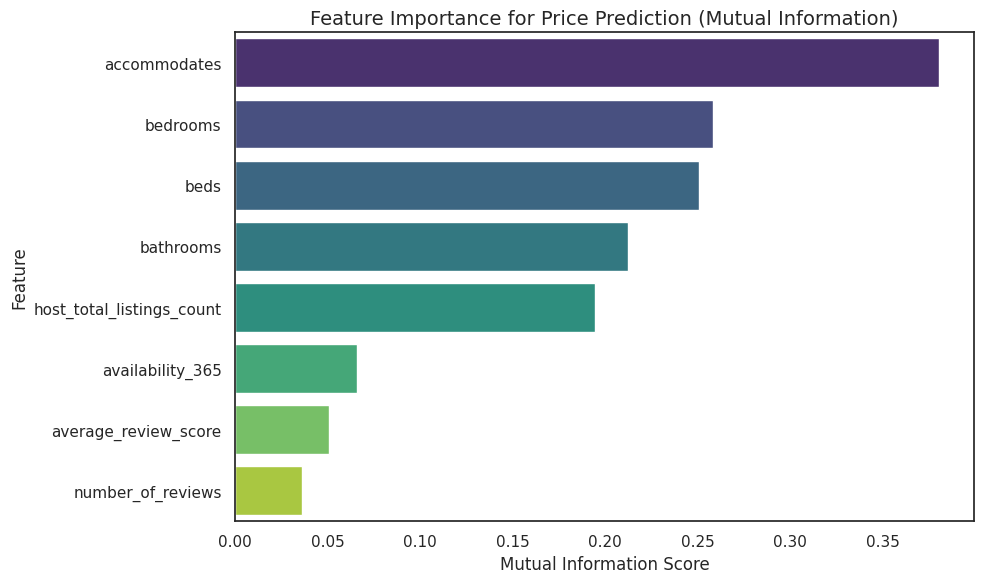


Selected features (MI > 0.203):
['accommodates', 'bedrooms', 'beds', 'bathrooms']


In [235]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# MUTUAL INFORMATION FOR REGRESSION (Predicting Price)

print("MUTUAL INFORMATION ANALYSIS FOR PRICE PREDICTION")


# Select features for analysis
numeric_features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 
                    'number_of_reviews', 'average_review_score', 
                    'availability_365', 'host_total_listings_count']

# Prepare data
X_mi = df[numeric_features].fillna(df[numeric_features].median())
y_mi = df['price']

# Remove rows where target is missing
mask = ~y_mi.isna()
X_mi = X_mi[mask]
y_mi = y_mi[mask]

# Calculate Mutual Information scores
mi_scores = mutual_info_regression(X_mi, y_mi, random_state=42)

# Create DataFrame and sort
mi_results = pd.DataFrame({
    'Feature': numeric_features,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\nMutual Information Scores (Higher = More Important):")
print(mi_results)
print(f"\nInterpretation: Features with MI > {mi_results['MI_Score'].median():.3f} (median) are strong predictors.")

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_results, x='MI_Score', y='Feature', palette='viridis')
plt.title('Feature Importance for Price Prediction (Mutual Information)', fontsize=14)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# OPTIONAL: Feature Selection based on MI threshold
threshold = mi_results['MI_Score'].quantile(0.5)  # Keep top 50%
selected_features = mi_results[mi_results['MI_Score'] > threshold]['Feature'].tolist()
print(f"\nSelected features (MI > {threshold:.3f}):")
print(selected_features)

# 5. My Tableau Dashboards but in Jupiter instead of Tableau

## I decided to recreate all my Tableau Dashboards in Jupiter for easier convience and more customization (They're still Tableau as well)

## Tableau Sheet 1. Listing and Plot Map

In [236]:

df["price"].describe()



count    4051.000000
mean      274.532708
std       222.127500
min        14.000000
25%       140.000000
50%       218.000000
75%       346.000000
max      4001.000000
Name: price, dtype: float64

### Direct Translation of Tableau Map

In [237]:
import plotly.express as px

price_95th_percentile = df['price'].quantile(0.95)

my_custom_colors = ['lightgreen', 'darkblue', 'purple', 'orange', 'red']

fig = px.scatter_map( 
    df,
    lat="latitude",
    lon="longitude",
    color="price",
    hover_name="name",
    
    hover_data={
        "neighbourhood_cleansed": True,
        "price": ':.2f',
        "latitude": False,
        "longitude": False,
        "accommodates": ':d',          
        "bedrooms": ':d',              
        "bathrooms": ':.1f',           
        "average_review_score": ':.2f', 
        "property_type": True

    },
    
    
    color_continuous_scale=my_custom_colors,  
    range_color=[0, price_95th_percentile],   
    
    zoom=10,
    #map_provider="carto-positron"             # <--- Replaces mapbox_style
)

# Update layout for a cleaner look
fig.update_layout(
    title=f'Listing Price Map (Color Capped at 95th percentile: ${price_95th_percentile:.2f})',
    margin={"r":0, "t":30, "l":0, "b":0}
)

fig.show()

### Version 2: Folium Heatmap

In [238]:
import folium
from folium.plugins import HeatMap

# 1. Create a base map centered on your data's average lat/lon
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# 2. Create the data for the heatmap
# We need a list of [lat, lon, weight]
# We'll use 'price' as the weight for the heat
heat_data = df[['latitude', 'longitude', 'price']].dropna().values.tolist()

# 3. Add the heatmap layer to the map
HeatMap(heat_data, radius=15).add_to(m)

# 4. Show the map
m

### Insights

Seems to be a spread of prices. Most concentrated are places like Downtown but also areas near high urban areas and public transit. Outer edges and places squuzed in between high density areas seem cheaper

## Tableau Sheet 2: Average Price by Room Type (and Superhost)

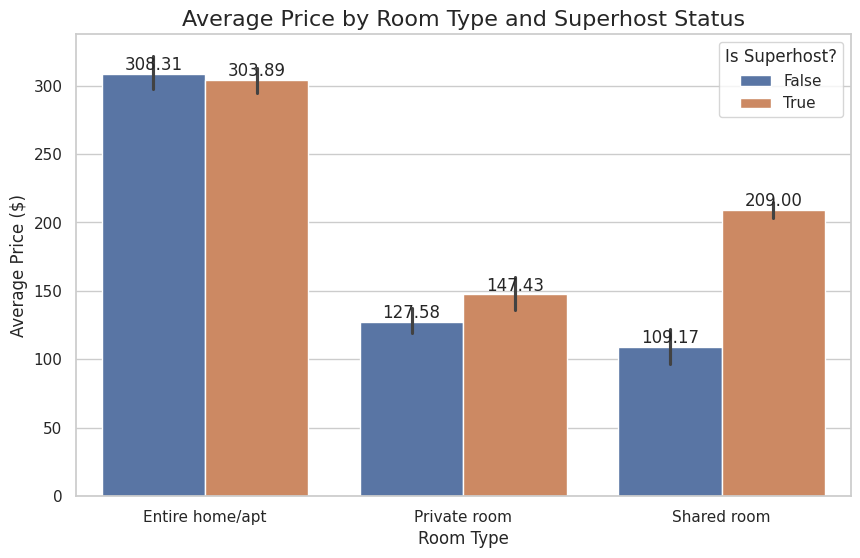

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme
sns.set_theme(style="whitegrid")


#df_filtered = df[df['price'] < 500]
df_filtered = df[df['price'] < 4000]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_filtered,
    x='room_type',           # X-axis: Categorical
    y='price',               # Y-axis: Numerical (Seaborn automatically calculates the average)
    hue='host_is_superhost',  # Grouping: The categorical variable for color
    

    
)

# Add titles and labels for clarity
plt.title('Average Price by Room Type and Superhost Status', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.legend(title='Is Superhost?')
#Show price on both bars

plt.bar_label(plt.gca().containers[0], fmt='%.2f', label_type='edge')
plt.bar_label(plt.gca().containers[1], fmt='%.2f', label_type='edge')


plt.show()

### Insights


Hosts seem to charge the same for each type of rooms. With superhosts charging more for shared rooms

## Tableau Sheet 3: Listings by Property Type and their Revenue

In [240]:
import plotly.express as px
import pandas as pd

# 1. --- Prepare the Data for the Treemap ---
# We must group by 'property_type' first
df_treemap = df.groupby('property_type').agg(
    listing_count=('id', 'count'),                 # This will be the SIZE
    avg_revenue=('estimated_revenue_l365d', 'mean')  # This will be the COLOR
).reset_index() # Puts 'property_type' back as a column

# (Optional) For a cleaner chart, you can filter out
# property types with very few listings
#df_treemap = df_treemap[df_treemap['listing_count'] > 5]


# 2. --- Create the Treemap ---
fig = px.treemap(
    df_treemap,
    
    # 'path' defines the hierarchy (the boxes)
    path=[px.Constant("All Property Types"), 'property_type'], 
    
    # 'values' defines the size of the boxes
    values='listing_count',
    
    # 'color' defines the color of the boxes
    color='avg_revenue',
    
    # This color scale (Green-Yellow-Red) matches your Tableau legend
    color_continuous_scale='RdYlGn_r', 
    color_continuous_midpoint=47935,
    
    # This adds extra info to the hover tooltip
    hover_data={
        'property_type': False, 
        'avg_revenue': ':.2f'   # Format revenue to 2 decimal places
    },
    
    title='Listings by Property Type and their Average Revenue'
)

# 3. --- Customize the labels ---
# This updates the text inside the boxes to show the label and its percentage
fig.update_traces(textinfo="label+percent root")

fig.update_layout(
    margin={"r":0, "t":50, "l":0, "b":0} # Add top margin for the title
)

fig.show()

### Insights

Looks like generally, the amount of revenue "scales" somnewhat with the property type. Super expensive and rare private rooms make more revenue than regular homes despite being small in quantity. The opposite is also true. Regular rental units and homes make up their revenue through low price + large quantities

## Tableau Sheet 4: "Host Completeness ""Do hosts with more complete profiles (Profile pic, about, location, identity) get more reviews or better scores?""

In [241]:
# 1. Create the 'host_profile_score' column
# Using .astype(int) is the most robust way to convert True/False to 1/0
df['host_profile_score'] = (
    df['host_has_about'].astype(int) + 
    df['host_has_profile_pic'].astype(int) + 
    df['host_identity_verified'].astype(int) +
    df['host_location_provided'].astype(int)
)

# 2. --- THIS IS THE IMPORTANT DEBUGGING STEP ---
# Let's check the distribution of the scores it just created
print("Distribution of Host Profile Scores:")
print(df['host_profile_score'].value_counts().sort_index())

Distribution of Host Profile Scores:
host_profile_score
0       8
1     172
2     689
3    1342
4    1840
Name: count, dtype: int64


### Translate Tableau Graph

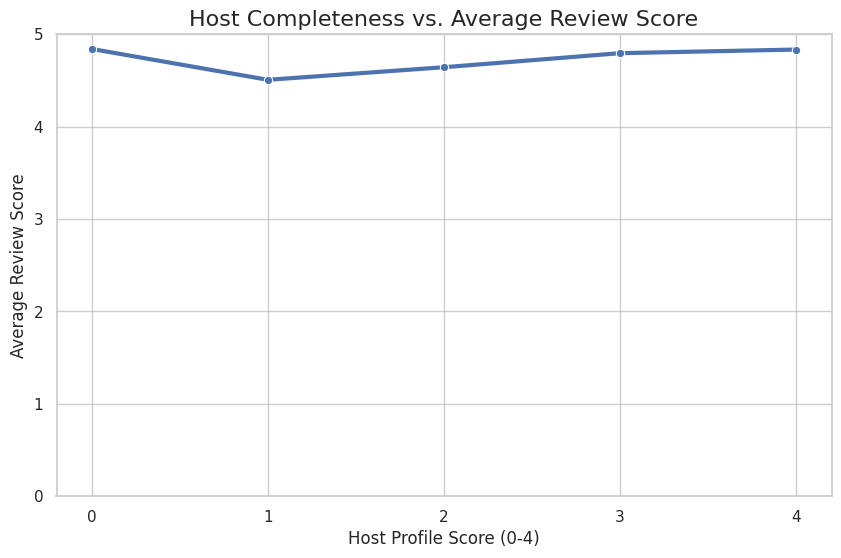

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme
sns.set_theme(style="whitegrid")

# 1. Create the summary data (just like Tableau's AVG)
# We group by the new score and get the mean of the review scores
score_summary = df.groupby('host_profile_score')['average_review_score'].mean().reset_index()

# 2. Plot the summary data
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=score_summary,
    x='host_profile_score',
    y='average_review_score',
    marker='o',  # Add markers to the points
    linewidth=3  # Make the line thicker
)

# Set titles and labels
plt.title('Host Completeness vs. Average Review Score', fontsize=16)
plt.xlabel('Host Profile Score (0-4)')
plt.ylabel('Average Review Score')

# Set the x-axis ticks to be integers
plt.xticks([0, 1, 2, 3, 4])
plt.ylim(0, 5) 

plt.show()

### Bonus Graph 1. Checking Outliers

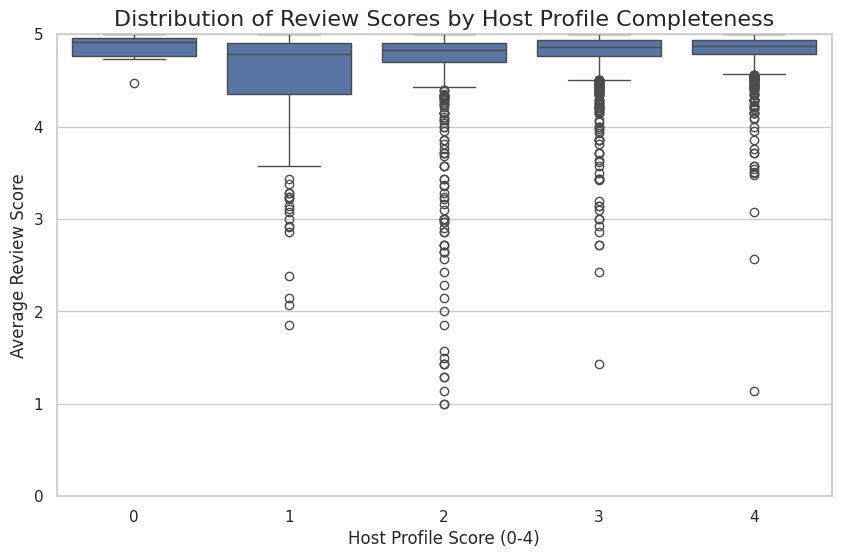

In [243]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='host_profile_score',
    y='average_review_score'
)

# Set titles and labels
plt.title('Distribution of Review Scores by Host Profile Completeness', fontsize=16)
plt.xlabel('Host Profile Score (0-4)')
plt.ylabel('Average Review Score')
plt.ylim(0, 5) 
plt.show()

### Tableau 4.5

/tmp/ipykernel_187099/4281335320.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




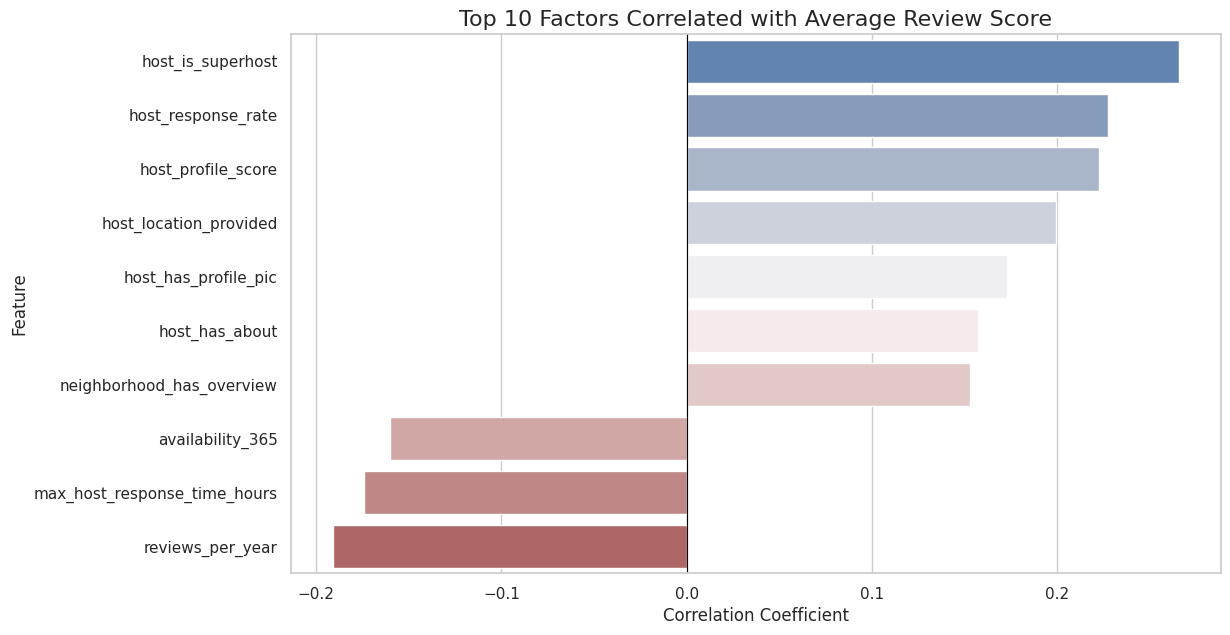

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select all numeric and boolean columns for correlation

review_corr_cols = [
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 
    'minimum_nights', 'availability_365', 'number_of_reviews', 
    'instant_bookable', 'reviews_per_year', 'max_host_response_time_hours', 
    'host_has_about', 'neighborhood_has_overview', 'host_location_provided', 
    'host_profile_score', 'average_review_score' # Our target
]

# 2. Calculate the correlation matrix
# We filter to only include columns that actually exist in the df
existing_cols = [col for col in review_corr_cols if col in df.columns]
corr_matrix = df[existing_cols].corr()

# 3. Isolate correlations with 'average_review_score'
corr_with_reviews = corr_matrix['average_review_score'].drop('average_review_score')

# 4. Get the Top 10 strongest (positive or negative)
# We get the absolute value to find the strongest, then sort
strongest_corr = corr_with_reviews.abs().sort_values(ascending=False).head(10)

# 5. Get the original (non-absolute) values for plotting
top_10_factors = corr_with_reviews[strongest_corr.index].sort_values(ascending=False)

# 6. Plot the horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_10_factors.values, 
    y=top_10_factors.index, 
    palette='vlag' # A nice Red-Blue diverging palette
)
plt.title('Top 10 Factors Correlated with Average Review Score', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8) # Add a line at zero
plt.show()

### Insights

Seems like all these factors only slightly affect review scores?

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4051 entries, 0 to 5536
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            4051 non-null   int64         
 1   name                          4051 non-null   object        
 2   description                   4018 non-null   object        
 3   neighborhood_overview         4051 non-null   object        
 4   host_since                    4049 non-null   datetime64[ns]
 5   host_location                 4051 non-null   object        
 6   host_about                    4051 non-null   object        
 7   host_response_rate            3775 non-null   float64       
 8   host_acceptance_rate          3909 non-null   float64       
 9   host_is_superhost             4051 non-null   bool          
 10  host_neighbourhood            3887 non-null   object        
 11  host_total_listings_count     4049 

## Tableau Sheet 5. The Price Matrix (Beds vs Baths)

Setting color bar center to the data's median: $476.79


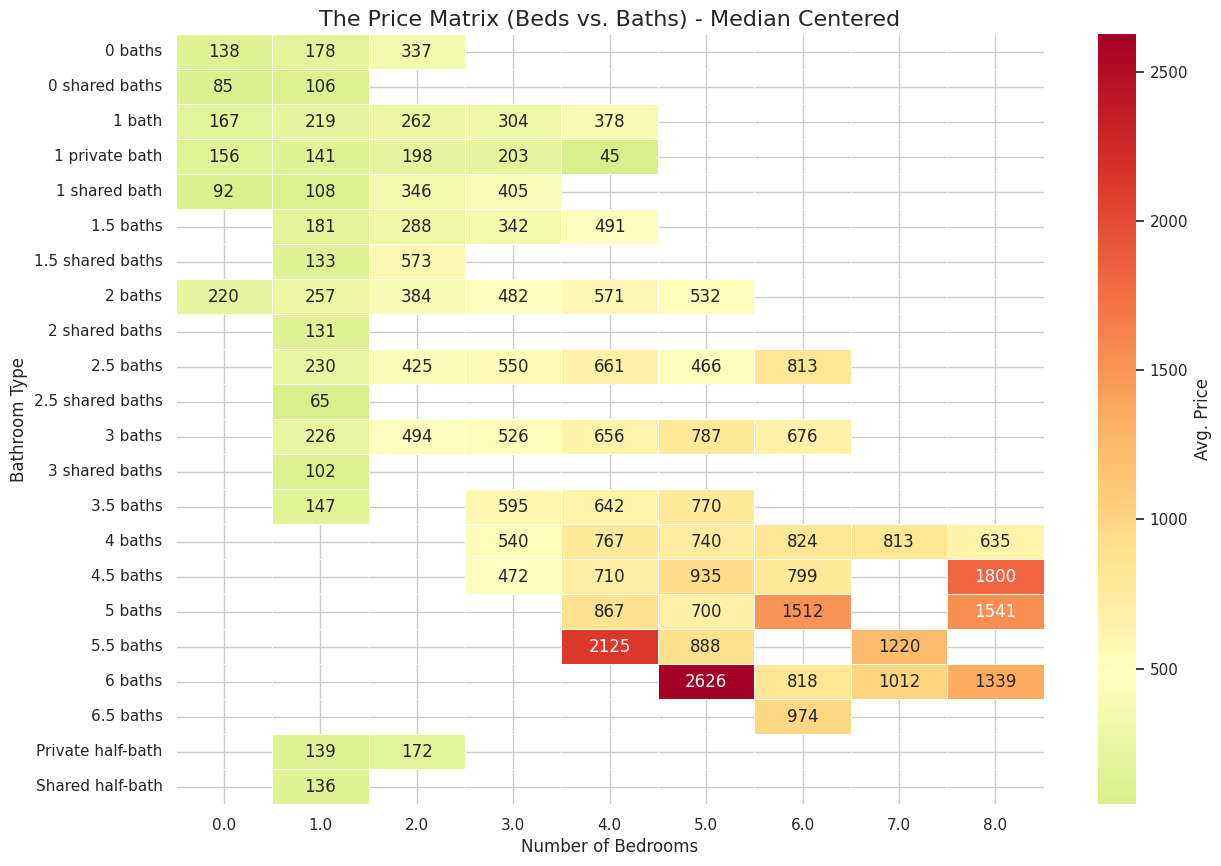

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

# 1. --- Prepare the Data 
df_grouped = df.groupby(['bathrooms_text', 'bedrooms'])['price'].mean()
df_pivot = df_grouped.unstack(level='bedrooms')

# 2. --- THIS IS THE NEW STEP ---
# Find the true median of all values in our new pivot table
# .stack() turns the matrix back into a single column, .median() finds the middle value
pivot_median = df_pivot.stack().median()
print(f"Setting color bar center to the data's median: ${pivot_median:,.2f}")

# 3. --- Plot the Heatmap (with one new parameter) ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_pivot,
    annot=True,
    fmt=".0f",
    cmap="RdYlGn_r",
    linewidths=.5,
    cbar_kws={'label': 'Avg. Price'},
    
   
    center=pivot_median  # This tells Seaborn where to put "yellow"
)

plt.title('The Price Matrix (Beds vs. Baths) - Median Centered', fontsize=16)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Bathroom Type')
plt.show()

### Insights

Seems that 3+ Baths/Baths is when the price starts jumping up

## Tableau Sheet 6: Scatter: Price vs Accommodates (Featuring Room Type and Reviews Per Year)

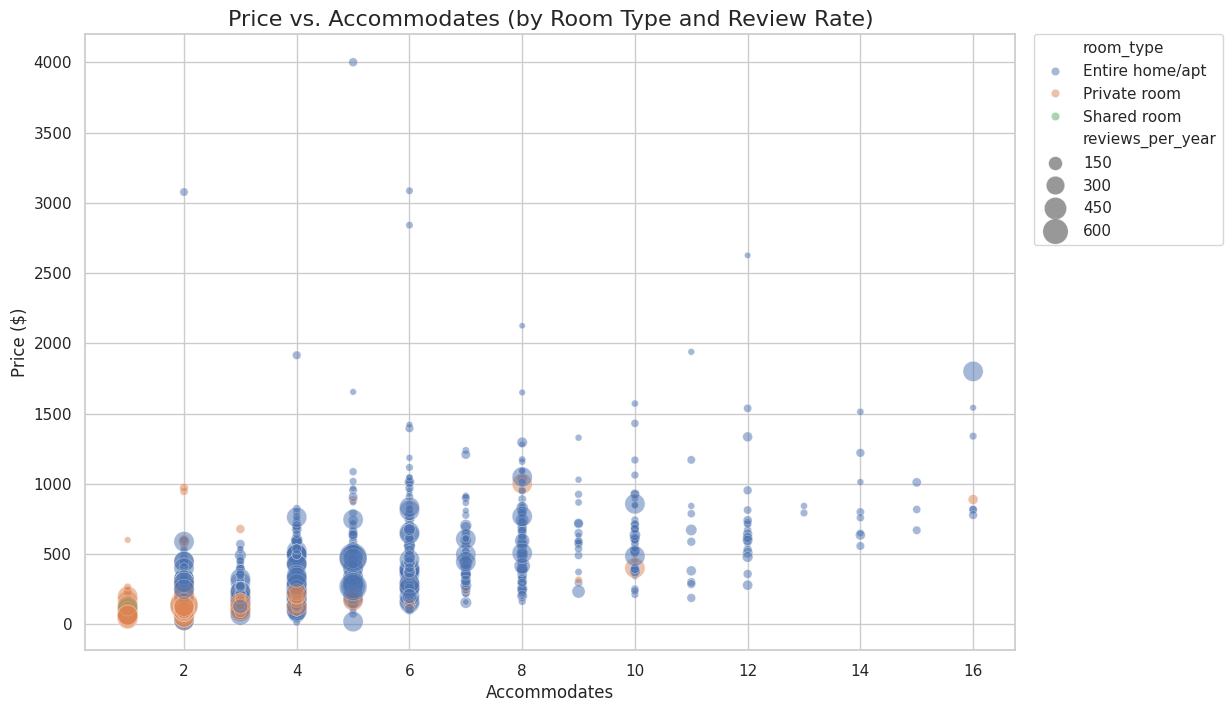

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. --- Filter the Data for a Readable Plot ---

df_scatter = df[df['price'] < 9000] 

# 2. --- Create the Scatter Plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_scatter,
    x='accommodates',
    y='price',
    hue='room_type',           # This maps 'room_type' to COLOR
    size='reviews_per_year',   # This maps 'reviews_per_year' to SIZE
    
    alpha=0.5,                 # Add transparency to see overlapping points
    sizes=(20, 400)            # Set a min and max bubble size
)

# 3. --- Add Titles and Labels ---
plt.title('Price vs. Accommodates (by Room Type and Review Rate)', fontsize=16)
plt.xlabel('Accommodates')
plt.ylabel('Price ($)')

# 4. --- Move the legend outside the plot ---
# This is often needed so the legend doesn't cover the data
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

### Insights

Seems like homes/appartments are the most common, span the most rang of prices and accomodations and consequently tend to have the widest spectrum of reviews. Private Rooms tend to have more reviews but accomodate fewer people are are lower priced

## Tableau Sheet 7: (Ranked): Top 10 Neighborhoods by Median Revenue

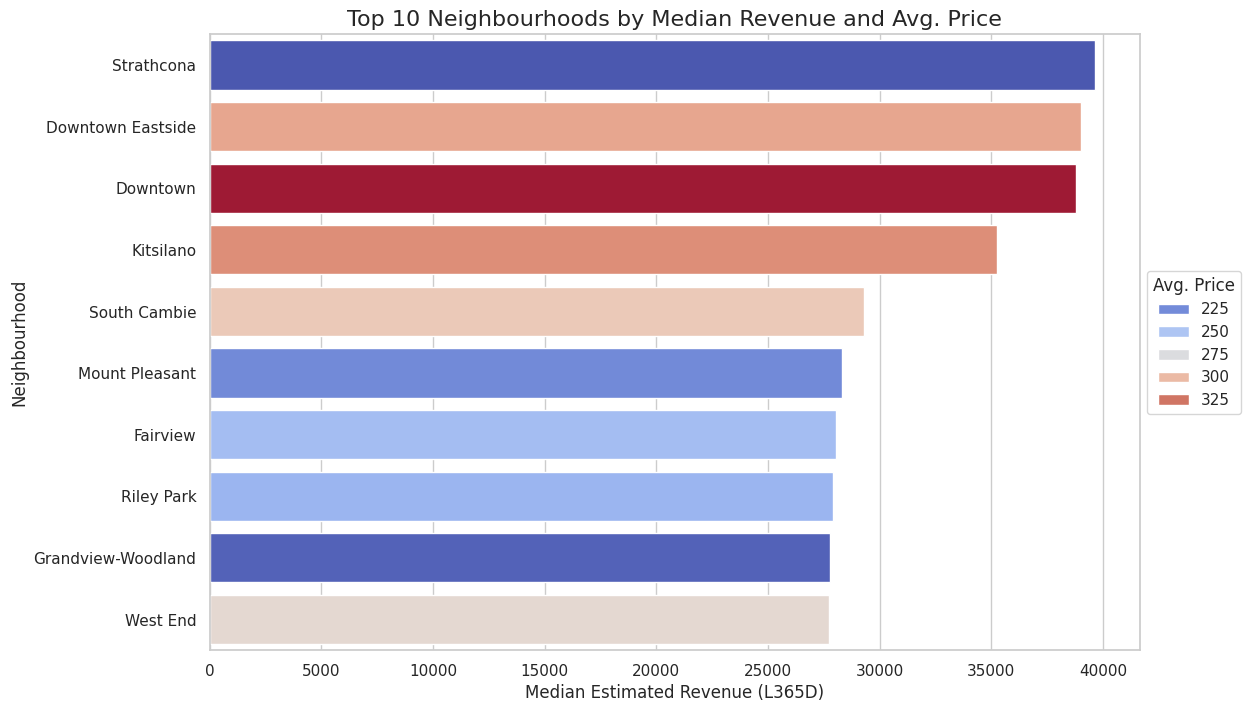

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. --- Prepare the Data ---
# Group by neighbourhood and get all the metrics we need
df_hoods = df.groupby('neighbourhood_cleansed').agg(
    median_revenue=('estimated_revenue_l365d', 'median'),
    avg_price=('price', 'mean'),
    listing_count=('id', 'count')
).reset_index()

# 2. --- Get the Top 10 ---
# Sort by median revenue and take the top 10
df_top10 = df_hoods.sort_values(by='median_revenue', ascending=False).head(10)

# 3. --- Plot the Improved Chart ---
plt.figure(figsize=(12, 8))

# We'll use a barplot and map 'avg_price' to the color (hue)
# We use 'dodge=False' so the bars aren't split
sns.barplot(
    data=df_top10,
    y='neighbourhood_cleansed',  # Y-axis is better for long names
    x='median_revenue',        # X-axis is the value
    hue='avg_price',           # This adds the 2nd variable
    palette='coolwarm',        # A palette to show high/low prices
    dodge=False
)

plt.title('Top 10 Neighbourhoods by Median Revenue and Avg. Price', fontsize=16)
plt.xlabel('Median Estimated Revenue (L365D)')
plt.ylabel('Neighbourhood')
plt.legend(title='Avg. Price', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 6. Machine Learning Predictions

## Predicting Price based on factors

### Linear Regression

In [249]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: problems found:
        - require?  X jupyter-js-widgets/extension


The Problem: "The machine learning task is to predict the price of an Airbnb listing."

The Target Variable: "The dependent (target) variable is price."

The Predictor Variables: "The independent (predictor) variables include accommodates, bedrooms, bathrooms, neighbourhood_cleansed, etc."

Justification: "This is a regression problem because the target variable, price, is a continuous numerical value, not a discrete category (like 'Yes/No')."

Business Context: "The business context is to build a model that can help new hosts set a competitive price for their listings or help analysts understand the key drivers of listing prices in Vancouver."

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Use UNIQUE variable names for price model
price_target = 'price'
price_numerical_features = [
    'accommodates', 
    'bedrooms', 
    'beds', 
    'bathrooms', 
    'number_of_reviews', 
    'average_review_score', 
    'availability_365', 
    'host_total_listings_count'
]
price_categorical_features = [
    'property_type', 
    'room_type', 
    'neighbourhood_cleansed'
]

# Create price model dataframe
price_features = price_numerical_features + price_categorical_features
price_model_df = df[price_features + [price_target]].copy()

# Fill missing values
for col in price_numerical_features:
    median_val = price_model_df[col].median()
    price_model_df[col] = price_model_df[col].fillna(median_val)

for col in price_categorical_features:
    mode_val = price_model_df[col].mode()[0]
    price_model_df[col] = price_model_df[col].fillna(mode_val)

# One-hot encode
price_model_df_encoded = pd.get_dummies(
    price_model_df, 
    columns=price_categorical_features, 
    drop_first=True
)

# Define X and y for PRICE model
price_y = price_model_df_encoded[price_target]
price_X = price_model_df_encoded.drop(columns=[price_target])

# Split data
price_X_train, price_X_test, price_y_train, price_y_test = train_test_split(
    price_X, price_y, test_size=0.25, random_state=0
)

print(f"Price Model - Training with {price_X_train.shape[1]} features.")

# Train model
price_lin_reg = LinearRegression()
price_lin_reg.fit(price_X_train, price_y_train)

# Evaluate
price_predictions = price_lin_reg.predict(price_X_test)
price_rmse = np.sqrt(mean_squared_error(price_y_test, price_predictions))
price_r2 = r2_score(price_y_test, price_predictions)

print(f"Root Mean Squared Error (RMSE): ${price_rmse:.2f}")
print(f"R2-Square: {price_r2:.2f}")
print(f"\nRMSE: On average, the model's price predictions are off by about ${price_rmse:.2f}.")
print(f"R2-Square: The model explains about {price_r2*100:.1f}% of the variance in the price.")


Price Model - Training with 75 features.
Root Mean Squared Error (RMSE): $188.72
R2-Square: 0.46

RMSE: On average, the model's price predictions are off by about $188.72.
R2-Square: The model explains about 46.1% of the variance in the price.


In [251]:
#Feature Importance
feature_importance = pd.DataFrame(
    {
        'feature': price_X.columns,
        'coefficient': price_lin_reg.coef_
    }
).sort_values('coefficient', ascending=False)

feature_importance.head(10)


feature  coefficient
33  property_type_Private room in serviced apartment   504.696282
16                        property_type_Entire place   289.847778
24                property_type_Private room in boat   285.473636
30              property_type_Private room in hostel   113.288617
20                property_type_Entire vacation home    92.918678
3                                          bathrooms    79.061188
40                       property_type_Room in hotel    68.026366
53                   neighbourhood_cleansed_Downtown    62.929963
73                   neighbourhood_cleansed_West End    58.784642
54          neighbourhood_cleansed_Downtown Eastside    45.368632

### Testing Box

In [252]:
import ipywidgets as widgets
from ipywidgets import interact

# FREEZE feature names for price model
PRICE_FEATURE_NAMES = price_X_train.columns.tolist().copy()

# Get options for dropdowns
price_property_types = sorted(price_model_df['property_type'].dropna().unique().tolist())
price_room_types = sorted(price_model_df['room_type'].dropna().unique().tolist())
price_neighbourhoods = sorted(price_model_df['neighbourhood_cleansed'].dropna().unique().tolist())

print(f"\n✓ Price model ready with {len(PRICE_FEATURE_NAMES)} features")


def predict_price(accommodates, bedrooms, beds, bathrooms, 
                  number_of_reviews, average_review_score, availability_365,
                  host_total_listings_count, property_type, 
                  room_type, neighbourhood_cleansed):
    
    # Create input
    input_data = pd.DataFrame({
        'accommodates': [float(accommodates)],
        'bedrooms': [float(bedrooms)],
        'beds': [float(beds)],
        'bathrooms': [float(bathrooms)],
        'number_of_reviews': [float(number_of_reviews)],
        'average_review_score': [float(average_review_score)],
        'availability_365': [float(availability_365)],
        'host_total_listings_count': [float(host_total_listings_count)],
        'property_type': [property_type],
        'room_type': [room_type],
        'neighbourhood_cleansed': [neighbourhood_cleansed]
    })
    
    # One-hot encode
    input_encoded = pd.get_dummies(
        input_data, 
        columns=['property_type', 'room_type', 'neighbourhood_cleansed'],
        drop_first=True
    )
    
    # Align with trained model features
    final_input = pd.DataFrame(
        np.zeros((1, len(PRICE_FEATURE_NAMES))), 
        columns=PRICE_FEATURE_NAMES,
        dtype=np.float64
    )
    
    for col in input_encoded.columns:
        if col in PRICE_FEATURE_NAMES:
            final_input[col] = input_encoded[col].values[0]
    
    # Predict using PRICE model
    prediction = price_lin_reg.predict(final_input)
    print(f"✓ Predicted Price: ${prediction[0]:.2f}")
    return prediction[0]


# Create widget
print("\n" + "="*60)
print("PRICE PREDICTION WIDGET")
print("="*60)

interact(
    predict_price,
    accommodates = widgets.IntSlider(value=2, min=1, max=16, step=1, description='Accommodates:', continuous_update=False),
    bedrooms = widgets.FloatSlider(value=1.0, min=0.0, max=10.0, step=1.0, description='Bedrooms:', continuous_update=False),
    beds = widgets.FloatSlider(value=1.0, min=0.0, max=16.0, step=1.0, description='Beds:', continuous_update=False),
    bathrooms = widgets.FloatSlider(value=1.0, min=0.5, max=8.0, step=0.5, description='Bathrooms:', continuous_update=False),
    number_of_reviews = widgets.IntSlider(value=20, min=0, max=500, step=5, description='Reviews:', continuous_update=False),
    average_review_score = widgets.FloatSlider(value=4.5, min=0.0, max=5.0, step=0.1, description='Review Score:', continuous_update=False),
    availability_365 = widgets.IntSlider(value=100, min=0, max=365, step=10, description='Availability:', continuous_update=False),
    host_total_listings_count = widgets.IntSlider(value=1, min=0, max=50, step=1, description='Host Listings:', continuous_update=False),
    property_type = widgets.Dropdown(options=price_property_types, value=price_property_types[0], description='Property Type:'),
    room_type = widgets.Dropdown(options=price_room_types, value=price_room_types[0], description='Room Type:'),
    neighbourhood_cleansed = widgets.Dropdown(options=price_neighbourhoods, value=price_neighbourhoods[0], description='Neighbourhood:')
);


✓ Price model ready with 75 features

PRICE PREDICTION WIDGET


interactive(children=(IntSlider(value=2, continuous_update=False, description='Accommodates:', max=16, min=1),…

### Decision Tree Regressor

In [253]:
from sklearn.tree import DecisionTreeRegressor

# 1. Initialize the model (with default parameters)
# We set random_state=0 for reproducible results
dt_reg = DecisionTreeRegressor(random_state=0)

# 2. Train the model
print("Training Decision Tree Regressor...")
dt_reg.fit(price_X_train, price_y_train)

# 3. Evaluate the model
dt_predictions = dt_reg.predict(price_X_test)
dt_rmse = np.sqrt(mean_squared_error(price_y_test, dt_predictions))
dt_r2 = r2_score(price_y_test, dt_predictions)

print(f"--- Decision Tree Results ---")
print(f"Root Mean Squared Error (RMSE): ${dt_rmse:.2f}")
print(f"R2-Square: {dt_r2:.2f}")

Training Decision Tree Regressor...
--- Decision Tree Results ---
Root Mean Squared Error (RMSE): $251.93
R2-Square: 0.04


### Model 3: Random Forest Regressor

In [254]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the model (with default parameters)

rf_reg = RandomForestRegressor(random_state=0)

# 2. Train the model
print("Training Random Forest Regressor...")
rf_reg.fit(price_X_train, price_y_train)

# 3. Evaluate the model
rf_predictions = rf_reg.predict(price_X_test)
rf_rmse = np.sqrt(mean_squared_error(price_y_test, rf_predictions))
rf_r2 = r2_score(price_y_test, rf_predictions)

print(f"--- Random Forest Results ---")
print(f"Root Mean Squared Error (RMSE): ${rf_rmse:.2f}")
print(f"R2-Square: {rf_r2:.2f}")

Training Random Forest Regressor...
--- Random Forest Results ---
Root Mean Squared Error (RMSE): $189.68
R2-Square: 0.46


### Model 4: Support Vector Regressor (SVR)

In [255]:
from sklearn.svm import SVR

# 1. Initialize the model (with default parameters)
svr_reg = SVR()

# 2. Train the model
print("Training Support Vector Regressor (SVR)...")
svr_reg.fit(price_X_train, price_y_train)

# 3. Evaluate the model
svr_predictions = svr_reg.predict(price_X_test)
svr_rmse = np.sqrt(mean_squared_error(price_y_test, svr_predictions))
svr_r2 = r2_score(price_y_test, svr_predictions)

print(f"--- SVR Results ---")
print(f"Root Mean Squared Error (RMSE): ${svr_rmse:.2f}")
print(f"R2-Square: {svr_r2:.2f}")

Training Support Vector Regressor (SVR)...
--- SVR Results ---
Root Mean Squared Error (RMSE): $265.39
R2-Square: -0.07


### Evaluating Models and Summary Table

In [ ]:
import pandas as pd

# 1. Store the results from  first model (Linear Regression)

price_rmse = 188.72
price_r2 = 0.46

# 2. Create the summary DataFrame
results_data = {
    'Model': [
        'Linear Regression', 
        'Decision Tree Regressor', 
        'Random Forest Regressor', 
        'Support Vector Regressor (SVR)'
    ],
    'RMSE ($)': [
        price_rmse, 
        dt_rmse, 
        rf_rmse, 
        svr_rmse
    ],
    'R2-Score': [
        price_r2, 
        dt_r2, 
        rf_r2, 
        svr_r2
    ]
}

results_df = pd.DataFrame(results_data).sort_values(by='R2-Score', ascending=False)

# 3. Display the results
print("--- Baseline Model Comparison ---")
print(results_df.to_markdown(index=False))

# 4. Justification
print("\n--- Metric Justification ---")
print("RMSE (Root Mean Squared Error) was chosen because it penalizes large errors heavily and is in the same unit as the target (dollars), making it highly interpretable.")
print("R2-Score (Coefficient of Determination) was chosen to measure the proportion of the variance in price that can be explained by the models. A score closer to 1.0 is better.")

--- Baseline Model Comparison ---
| Model                          |   RMSE ($) |   R2-Score |
|:-------------------------------|-----------:|-----------:|
| Linear Regression              |    188.72  |  0.46      |
| Random Forest Regressor        |    189.682 |  0.455905  |
| Decision Tree Regressor        |    251.927 |  0.0402196 |
| Support Vector Regressor (SVR) |    265.391 | -0.0651104 |

--- Metric Justification ---
RMSE (Root Mean Squared Error) was chosen because it penalizes large errors heavily and is in the same unit as the target (dollars), making it highly interpretable.
R2-Score (Coefficient of Determination) was chosen to measure the proportion of the variance in price that can be explained by the models. A score closer to 1.0 is better.


Metric Justification

    RMSE (Root Mean Squared Error): This metric was chosen because it is in the same unit as our target variable (price in $). This makes it highly interpretable. An RMSE of $188.72 means that, on average, our model's predictions are off by about $189. It penalizes large errors heavily, which is useful for price prediction.

    R2-Score (Coefficient of Determination): This was chosen to measure the proportion of the variance in price that our model can explain. A score of 0.46 means the model explains about 46% of the price variability, which is a decent starting point.

Best Performers: Linear Regression and Random Forest
This suggests that the features we selected (like bathrooms, bedrooms, accommodates) have a strong linear relationship with price, which the Linear Regression model captured well.

The Random Forest's similar performance indicates it also captured these linear trends, as well as some minor non-linear trends (e.g., the specific impact of a "Downtown" neighbourhood vs. a "West End" one is not purely linear, but is a categorical jump).

"Second Place" (and still pretty bad) is Decision Tree Regressor with R2 of 0.04.

A single Decision Tree, with default parameters, is highly prone to overfitting. It likely learned the 75 features in the training data perfectly, creating thousands of very specific rules that did not generalize to the new test data.

The worst is SVR with a negative R2 score. ooof. My  one-hot encoded data has features with very different scales (e.g., accommodates ranges from 1-16, while property_type_Entire_place is just 0 or 1). The SVR algorithm's internal math is thrown off by these unscaled magnitudes, leading to useless results.




## Bonus Review Score Prediction

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Create amenities count
df['amenities_count'] = df['amenities'].apply(
    lambda x: len(x.strip('[]').split(',')) if x != '[]' else 0
)

# Use UNIQUE variable names for review model
review_target = 'average_review_score'
review_numerical_features = [
    'host_response_rate', 
    'host_acceptance_rate', 
    'amenities_count',
    'price', 
    'bedrooms', 
    'bathrooms'
]
review_boolean_features = [
    'host_is_superhost',
    'instant_bookable'
]
review_categorical_features = [
    'property_type'
]

# Create review model dataframe
review_features = review_numerical_features + review_boolean_features + review_categorical_features
review_model_df = df[review_features + [review_target]].copy()

# Drop rows with missing target
review_model_df = review_model_df.dropna(subset=[review_target])

# Fill missing numerical features
for col in review_numerical_features:
    median_val = review_model_df[col].median()
    review_model_df[col] = review_model_df[col].fillna(median_val)

# Convert boolean to int
for col in review_boolean_features:
    review_model_df[col] = review_model_df[col].astype(int)

# Fill missing categorical features
for col in review_categorical_features:
    mode_val = review_model_df[col].mode()[0]
    review_model_df[col] = review_model_df[col].fillna(mode_val)

# One-hot encode
review_model_df_encoded = pd.get_dummies(
    review_model_df, 
    columns=review_categorical_features, 
    drop_first=True
)

# Define X and y for REVIEW model
review_y = review_model_df_encoded[review_target]
review_X = review_model_df_encoded.drop(columns=[review_target])

# Split data
review_X_train, review_X_test, review_y_train, review_y_test = train_test_split(
    review_X, review_y, test_size=0.25, random_state=0
)

print(f"Review Score Model - Training with {review_X_train.shape[1]} features.")

# Train model
review_lin_reg = LinearRegression()
review_lin_reg.fit(review_X_train, review_y_train)

# Evaluate
review_predictions = review_lin_reg.predict(review_X_test)
review_rmse = np.sqrt(mean_squared_error(review_y_test, review_predictions))
review_r2 = r2_score(review_y_test, review_predictions)

print(f"Root Mean Squared Error (RMSE): {review_rmse:.2f}")
print(f"R2-Square: {review_r2:.2f}")
print(f"\nRMSE: On average, the model's review score predictions are off by about {review_rmse:.2f} points.")
print(f"R2-Square: The model explains about {review_r2*100:.1f}% of the variance in the average review score.")


Review Score Model - Training with 51 features.
Root Mean Squared Error (RMSE): 0.33
R2-Square: 0.15

RMSE: On average, the model's review score predictions are off by about 0.33 points.
R2-Square: The model explains about 15.0% of the variance in the average review score.


In [258]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: problems found:
        - require?  X jupyter-js-widgets/extension


## Testing Box:


In [259]:

import ipywidgets as widgets
from ipywidgets import interact

# FREEZE feature names for review model
REVIEW_FEATURE_NAMES = review_X_train.columns.tolist().copy()

# Get options for dropdown
review_property_types = sorted(review_model_df['property_type'].dropna().unique().tolist())

print(f"\n✓ Review score model ready with {len(REVIEW_FEATURE_NAMES)} features")


def predict_review_score(host_is_superhost, host_response_rate, host_acceptance_rate, 
                         property_type, amenities_count, instant_bookable, 
                         price, bedrooms, bathrooms):
    
    # Create input
    input_data = pd.DataFrame({
        'host_is_superhost': [int(host_is_superhost)],
        'host_response_rate': [float(host_response_rate)],
        'host_acceptance_rate': [float(host_acceptance_rate)],
        'property_type': [property_type],
        'amenities_count': [int(amenities_count)],
        'instant_bookable': [int(instant_bookable)],
        'price': [float(price)],
        'bedrooms': [float(bedrooms)],
        'bathrooms': [float(bathrooms)]
    })
    
    # One-hot encode
    input_encoded = pd.get_dummies(
        input_data, 
        columns=['property_type'],
        drop_first=True
    )
    
    # Align with trained model features
    final_input = pd.DataFrame(
        np.zeros((1, len(REVIEW_FEATURE_NAMES))), 
        columns=REVIEW_FEATURE_NAMES,
        dtype=np.float64
    )
    
    for col in input_encoded.columns:
        if col in REVIEW_FEATURE_NAMES:
            final_input[col] = input_encoded[col].values[0]
    
    # Predict using REVIEW model
    prediction = review_lin_reg.predict(final_input)
    print(f"✓ Predicted Average Review Score: {prediction[0]:.2f} stars")
    return prediction[0]


# Create widget
print("\n" + "="*60)
print("REVIEW SCORE PREDICTION WIDGET")
print("="*60)

interact(
    predict_review_score,
    host_is_superhost = widgets.Checkbox(value=True, description='Superhost'),
    host_response_rate = widgets.FloatSlider(value=0.95, min=0.0, max=1.0, step=0.01, description='Response Rate'),
    host_acceptance_rate = widgets.FloatSlider(value=0.90, min=0.0, max=1.0, step=0.01, description='Accept Rate'),
    property_type = widgets.Dropdown(options=review_property_types, value=review_property_types[0], description='Property Type'),
    amenities_count = widgets.IntSlider(value=10, min=0, max=50, step=1, description='Amenities'),
    instant_bookable = widgets.Checkbox(value=False, description='Instant Book'),
    price = widgets.FloatSlider(value=150.0, min=20.0, max=1000.0, step=5.0, description='Price ($)'),
    bedrooms = widgets.IntSlider(value=2, min=1, max=10, step=1, description='Bedrooms'),
    bathrooms = widgets.FloatSlider(value=1.0, min=0.5, max=5.0, step=0.5, description='Bathrooms')
);


✓ Review score model ready with 51 features

REVIEW SCORE PREDICTION WIDGET


interactive(children=(Checkbox(value=True, description='Superhost'), FloatSlider(value=0.95, description='Resp…

In [260]:
#Feature Importance for review score model
review_feature_importance = pd.DataFrame(
    {
        'feature': review_X.columns,
        'coefficient': review_lin_reg.coef_
    }
).sort_values('coefficient', ascending=False)

review_feature_importance

feature   coefficient
24                property_type_Private room in boat  7.725716e-01
0                                 host_response_rate  7.018648e-01
11                      property_type_Entire cottage  1.323137e-01
6                                  host_is_superhost  1.265303e-01
47          property_type_Shared room in rental unit  1.209133e-01
23   property_type_Private room in bed and breakfast  1.103693e-01
41                 property_type_Shared room in barn  5.336175e-02
45                property_type_Shared room in hotel  3.136898e-02
2                                    amenities_count  4.392155e-03
38                  property_type_Room in aparthotel  1.193490e-15
22                           property_type_Houseboat  3.330669e-16
46                 property_type_Shared room in loft  0.000000e+00
48            property_type_Shared room in tiny home  0.000000e+00
50                               property_type_Tower  0.000000e+00
37                                property_type_Riad -3.191891e-15
31                property_type_Private room in loft -7.435025e-15
3                                              price -2.182788e-05
5                                          bathrooms -1.679408e-02
33  property_type_Private room in serviced apartment -1.796840e-02
4                                           bedrooms -1.801534e-02
49                           property_type_Tiny home -2.353584e-02
8                         property_type_Earthen home -3.934680e-02
36               property_type_Private room in villa -4.418903e-02
7                                   instant_bookable -5.000877e-02
19                    property_type_Entire townhouse -5.270980e-02
32         property_type_Private room in rental unit -6.001869e-02
16                        property_type_Entire place -8.594532e-02
13                   property_type_Entire guesthouse -9.202420e-02
12                  property_type_Entire guest suite -9.295907e-02
34           property_type_Private room in tiny home -9.717982e-02
14                         property_type_Entire home -1.006440e-01
30              property_type_Private room in hostel -1.055869e-01
1                               host_acceptance_rate -1.087024e-01
27         property_type_Private room in guest suite -1.148444e-01
9                      property_type_Entire bungalow -1.167722e-01
17                  property_type_Entire rental unit -1.383348e-01
39              property_type_Room in boutique hotel -1.423813e-01
15                         property_type_Entire loft -1.434340e-01
10                        property_type_Entire condo -1.495111e-01
21                        property_type_Entire villa -1.600522e-01
40                       property_type_Room in hotel -1.642181e-01
28          property_type_Private room in guesthouse -1.788899e-01
26               property_type_Private room in condo -2.059166e-01
25            property_type_Private room in bungalow -2.134647e-01
35           property_type_Private room in townhouse -2.202858e-01
42                property_type_Shared room in condo -2.690864e-01
18           property_type_Entire serviced apartment -2.780190e-01
44               property_type_Shared room in hostel -2.853956e-01
29                property_type_Private room in home -2.986316e-01
20                property_type_Entire vacation home -3.868697e-01
43                 property_type_Shared room in home -9.502417e-01

# Export

In [261]:
# Export cleaned data to CSV
#df.to_csv('listings_cleaned.csv', index=False)

import pandas as pd, csv


with open("listings_cleaned.csv", "w", newline="\n", encoding="utf-8") as f:
    df.to_csv(f, index=False, quoting=csv.QUOTE_ALL, doublequote=True)
